In [1]:
# !pip install pandas -U --user
# !pip install seaborn -U --user

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

# Сравнительное исследование тарифов

**Описание проекта**

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи.  

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра».  
Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.  

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов.  
В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.  
Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

**Тариф «Смарт»**  
Ежемесячная плата: 550 рублей  
Включено:
- 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  

Стоимость услуг сверх тарифного пакета:  
- минута разговора: 3 рубля  
- сообщение: 3 рубля  
- 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**  
Ежемесячная плата: 1950 рублей  
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  

Стоимость услуг сверх тарифного пакета:  
- минута разговора: 1 рубль  
- сообщение: 1 рубль  
- 1 Гб интернет-трафика: 150 рублей

```Примечание: «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.```

**Цель исследования**

Проверить гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Данные**

`/datasets/users.csv` (информация о пользователях):
- 'user_id' — уникальный идентификатор пользователя
- 'first_name' — имя пользователя
- 'last_name' — фамилия пользователя
- 'age' — возраст пользователя (годы)
- 'reg_date' — дата подключения тарифа (день, месяц, год)
- 'churn_date' — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- 'city' — город проживания пользователя
- 'tariff' — название тарифного плана

`/datasets/calls.csv` (информация о звонках):

- 'id' — уникальный номер звонка
- 'call_date' — дата звонка
- 'duration' — длительность звонка в минутах
- 'user_id' — идентификатор пользователя, сделавшего звонок

`/datasets/internet.csv` (информация об интернет-сессиях):
- 'id' — уникальный номер сессии
- 'mb_used' — объём потраченного за сессию интернет-трафика (в мегабайтах)
- 'session_date' — дата интернет-сессии
- 'user_id' — идентификатор пользователя

`/datasets/messages.csv` (информация о сообщениях):
- 'id' — уникальный номер сообщения
- 'message_date' — дата сообщения
- 'user_id' — идентификатор пользователя, отправившего сообщение

`/datasets/tariffs.csv` (информация о тарифах):
- 'tariff_name' — название тарифа
- 'rub_monthly_fee' — ежемесячная абонентская плата в рублях
- 'minutes_included' — количество минут разговора в месяц, включённых в абонентскую плату
- 'messages_included' — количество сообщений в месяц, включённых в абонентскую плату
- 'mb_per_month_included' — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- 'rub_per_minute' — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- 'rub_per_message' — стоимость отправки сообщения сверх тарифного пакета
- 'rub_per_gb' — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


## Шаг 1. Обзор данных

Открою файл с данными и изучу общую информацию.

In [3]:
try:
    # читаю датасеты
    users_data = pd.read_csv('datasets/users.csv')
    calls_data = pd.read_csv('datasets/calls.csv')
    internet_data = pd.read_csv('datasets/internet.csv')
    messages_data = pd.read_csv('datasets/messages.csv')
    tariffs_data = pd.read_csv('datasets/tariffs.csv')
except FileNotFoundError as e:
    print(repr(e))
    users_data = pd.read_csv('/datasets/users.csv')
    calls_data = pd.read_csv('/datasets/calls.csv')
    internet_data = pd.read_csv('/datasets/internet.csv')
    messages_data = pd.read_csv('/datasets/messages.csv')
    tariffs_data = pd.read_csv('/datasets/tariffs.csv')

FileNotFoundError(2, 'No such file or directory')


Последовательно ознакомлюсь с каждым из датасетов.

In [4]:
# получаю общую сводку
users_data.info()

# проверю на корректный вывод
display(users_data.head())

# проверяю имена колонок на пробелы
display(users_data.columns)

# проверю нет ли лишних значений в столбце ['tariff'], проверим величину выборки для каждого
display(users_data['tariff'].value_counts())

# описание
users_data.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

smart    351
ultra    149
Name: tariff, dtype: int64

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Предварительные замечания по датасету 'users':
- столбцы ['churn_date'] и ['reg_date'] можно перевести в формат datetime, но они не понадобятся для исследования. Я не буду отбрасывать выручку за неполные месяцы - правило начисление абонентской платы за неполный месяц не было задано, поэтмоу считаю что пользователь платит полностью, к тому же даже за неполный месяц пользователь мог выйти за пределы тарифного лимита;
- столбцы ['first_name'] и ['last_name'] не требуются для для исследования (Но могуть быть использованы для группировки потребителей по полу, для дополнения исследовательского анализа).
- столбец ['age'] также не требуется для выполнения поставленных задач (Но может быть использован для группировкки потребителей по возрасту, для дополнения исследовательского анализа).

In [5]:
# получаю общую сводку
calls_data.info()

# проверю на корректный вывод
display(calls_data.head())

# проверяю имена колонок на пробелы
display(calls_data.columns)

# описание
calls_data.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Предварительные замечания по датасету 'calls':
- следует перевести столбец 'call_date' в формат datetime;
- стобец 'duration' необходимо перевести в формат int с округлением в большую сторону (до целых минут);
- колонка ['id'] не требуется для исследования, сессии можно идентифицировать по дате и значению ['user_id'].

In [6]:
# получаю общую сводку
internet_data.info()

# проверю на корректный вывод
display(internet_data.head())

# проверяю имена колонок на пробелы
display(internet_data.columns)

# описание
internet_data.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Предварительные замечания по датасету 'internet':
- следует перевести столбец 'session_date' в формат datetime;
- колонка 'Unnamed: 0' незадокументирована и явно содержит значения индекса строк, можно удалить;
- колонка ['id'] не требуется для исследования, сессии можно идентифицировать по дате и значению ['user_id'];
- указано потребление траффика за сессию, придется сводить данные по году-месяцам для каждого user_id.

In [7]:
# получаю общую сводку
messages_data.info()

# проверю на корректный вывод
display(messages_data.head())

# проверяю имена колонок на пробелы
display(messages_data.columns)

# описание
messages_data.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Index(['id', 'message_date', 'user_id'], dtype='object')

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


Предварительные замечания по датасету 'messages':
- следует перевести столбец 'message_date' в формат datetime;
- колонка ['id'] не требуется для исследования, сессии можно идентифицировать по дате и значению ['user_id'].

In [8]:
# получаю общую сводку
tariffs_data.info()

# проверю на корректный вывод
display(tariffs_data.head())

# проверяю имена колонок на пробелы
display(tariffs_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

По датасету 'tariffs' замечаний нет, данные соответствуют описанию тарифа.

## Шаг 2. Предобработка данных

*Приведите данные к нужным типам; 
Найдите и исправьте ошибки в данных, если они есть.  
Поясните, какие ошибки вы нашли и как их исправили.  
В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.*

### 2.1 Работа с типами данных:

Переведу столбцы с датой в формат datetime.

**Отпала необходимость в следующих двух ячейках, просто очистил users_data.**

In [9]:
# ['churn_date'] - единственный столбец с пропусками, поэтому в head() не попали его данные. Проверю совпадает ли формат даты с другими столбцами
# users_data['churn_date'].dropna().head()

In [10]:
# совпадает, поэтому использую apply для изменения формата сразу двух столбцов
# нас не интересуют дни, только год и месяц, поэтому использую astype()
# users_data[['churn_date', 'reg_date']] = users_data[['churn_date', 'reg_date']].astype('datetime64[M]')

# проверю
# users_data[['churn_date', 'reg_date']].info()
# users_data[['churn_date', 'reg_date']].dropna().head()

In [11]:
# применяю метод astype(), дне не важны - передаю аргумент с [M]
calls_data['call_date'] = calls_data['call_date'].astype('datetime64[M]')
internet_data['session_date'] = internet_data['session_date'].astype('datetime64[M]')
messages_data['message_date'] = messages_data['message_date'].astype('datetime64[M]')

Округлю столбец ['duration'] датафрейма `calls_data` до целых значений в большую сторону (целых минут) и приведу его к формату int.

In [12]:
# изначальные данные для сравнения
display(calls_data['duration'].head())

# округляю
calls_data['duration'] = calls_data['duration'].apply(np.ceil)

# меняю тип данных столбца
calls_data['duration'] = calls_data['duration'].astype('int')

# проверяю результат
print('///////////')
display(calls_data['duration'].head())

0     0.00
1     0.00
2     2.85
3    13.80
4     5.18
Name: duration, dtype: float64

///////////


0     0
1     0
2     3
3    14
4     6
Name: duration, dtype: int64

### 2.2 Работа с ошибками и очистка данных:

Чтобы исключить возможность ошибок выгрузки, перед тем как избавляться от уникальных идентификаторво сессии проверю датафреймы на явные дубликаты.

In [13]:
# метод duplicated() и sum() для подсчета True-значений строк дубликатов
print(users_data.duplicated().sum())
print(calls_data.duplicated().sum())
print(internet_data.duplicated().sum())
messages_data.duplicated().sum()

0
0
0


0

Проверю уникальные значения столбца ['city'], так как он будет использоваться для проверки гипотезы и различные методы написания одних и тех же географических названий могут исказить данные.

In [14]:
display(users_data['city'].unique())
users_data['city'].value_counts()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Москва             99
Санкт-Петербург    39
Новосибирск        16
Казань             14
Омск               14
                   ..
Подольск            1
Нижневартовск       1
Архангельск         1
Химки               1
Иваново             1
Name: city, Length: 76, dtype: int64

Удалю колонки ['Unnamed: 0'] и ['id'] из датафрейма ```internet_data```.

In [15]:
# использую drop()
internet_data.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

# проверю
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   mb_used       149396 non-null  float64       
 1   session_date  149396 non-null  datetime64[ns]
 2   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 3.4 MB


Удаляю колонки ['id'] из датафреймов ```calls_data``` и ```messages_data```.

In [16]:
# использую drop()
calls_data.drop(['id'], axis=1, inplace=True)
messages_data.drop(['id'], axis=1, inplace=True)

# проверю
calls_data.info()
print('///////////')
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   call_date  202607 non-null  datetime64[ns]
 1   duration   202607 non-null  int64         
 2   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.6 MB
///////////
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   message_date  123036 non-null  datetime64[ns]
 1   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 MB


Приблизительно сгруппирую потребителей по полу.

In [17]:
# вместо функции с циклом использую numpy метод where()
users_data['sex'] = np.where(
    (users_data['first_name'].str[-1] == 'а') |
    (users_data['first_name'].str[-1] == 'я') |
    (users_data['last_name'].str[-1] == 'а'),
    'f',
    'm'
)

#проверю результат
users_data[['first_name', 'last_name', 'sex']].head(20)

,first_name,last_name,sex
0,Рафаил,Верещагин,m
1,Иван,Ежов,m
2,Евгений,Абрамович,m
3,Белла,Белякова,f
4,Татьяна,Авдеенко,f
5,Афанасий,Горлов,m
6,Леонид,Ермолаев,m
7,Юна,Березина,f
8,Рустэм,Пономарёв,m
9,Василиса,Блинова,f


Теперь разобью пользователей на три возростные группы young adults (18-35), middle-aged adults (36-55), older adults (56+). Возрастные границы взяты из следующего исследования - https://pubmed.ncbi.nlm.nih.gov/11815703/

In [18]:
# выведу образец для сравнения с результатом
display(users_data['age'].head(10))

# пока что не знаю можно ли использовать where() для более чем двух возможных результатов, поэтому использую цикл в функции
def age_group(age):
    if 18 <= age <= 35:
        return '18-35'
    if 36 <= age <= 55:
        return '36-55'
    return '56+'

# перезапишу группы сразу поверх столбца ['age']
users_data['age'] = users_data['age'].apply(age_group)

# проверю результат
users_data['age'].head(10)

0    52
1    41
2    59
3    23
4    68
5    67
6    21
7    65
8    63
9    24
Name: age, dtype: int64

0    36-55
1    36-55
2      56+
3    18-35
4      56+
5      56+
6    18-35
7      56+
8      56+
9    18-35
Name: age, dtype: object

Избавлюсь от столбцов ['churn_date'], ['reg_date'], ['first_name'] и ['last_name'].

In [19]:
# опять использую drop()
users_data.drop(['churn_date', 'reg_date', 'first_name', 'last_name'], axis=1, inplace=True)

# последняя проверка users_data
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  500 non-null    int64 
 1   age      500 non-null    object
 2   city     500 non-null    object
 3   tariff   500 non-null    object
 4   sex      500 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.7+ KB



Иных ошибок, пропусков и недочетов не найдено.

### 2.3 Расчеты и добавление результатов:

*Посчитайте для каждого пользователя:*
- *количество сделанных звонков и израсходованных минут разговора по месяцам;*
- *количество отправленных сообщений по месяцам;*
- *объем израсходованного интернет-трафика по месяцам;*
- *помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).*

Прежде чем объединять данные по месяцам, проверю какой временной период мы анализируем.

In [20]:
calls_data['call_date'].value_counts()

2018-12-01    33987
2018-11-01    29501
2018-10-01    27146
2018-09-01    24061
2018-08-01    21488
2018-07-01    18298
2018-06-01    14716
2018-05-01    12647
2018-04-01     9272
2018-03-01     6687
2018-02-01     3328
2018-01-01     1476
Name: call_date, dtype: int64

Выборка в пределах одного года. Вероятно, заметен ежемесячный приток пользователей на тарифы. Для расчетов исопльзуем данные по тарифам.

In [21]:
tariffs_data

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


~~Создам датафрейм с колонкой ['user_id'] содержащей все 500 значений, чтобы привести сводные таблицы к одному размеру и упростить последующие расчеты. Создаю его отдельно вместо использования users_data потому что желаю видеть ['user_id'] и категориальные столбцы первыми в сводных таблицах, считаю что проще сделать это через merge()~~

**Вместо этого очистил и использовал users_data, следующая ячейка кода больше не используется.** 

In [22]:
# user_id_df = list(range(1000, 1500))

# user_id_df = pd.DataFrame(user_id_df, columns=['user_id'])

# user_id_df.head()

Рассчитаю общую длительность и количество разговоров для каждого пользователя помесячно.

In [23]:
# использую сводную таблицу. Не заполняю пропуски так как NaN значения не участвуют в арифметических операциях - упростит расчет выручки
calls_dur_pivot = calls_data.pivot_table(index='user_id',  columns='call_date', values='duration', aggfunc='sum')

# дам уникальные названия колонкам и избавлюсь от мультииндекса. При этом сохраню старый индекс, который станет колонкой ['user_id']
calls_dur_pivot.columns = ['calls_dur_01', 'calls_dur_02', 'calls_dur_03', 'calls_dur_04', 'calls_dur_05', 'calls_dur_06', 'calls_dur_07', 'calls_dur_08', 'calls_dur_09', 'calls_dur_10', 'calls_dur_11', 'calls_dur_12']
calls_dur_pivot.reset_index(inplace=True)

# дополню строками с user_id которые за весь год не использовали звонки. Добавлю столбец с тарифом для упрощения расчета выручки
calls_dur_pivot = users_data.merge(calls_dur_pivot, how='left', on='user_id')

# отпала необходимость в следующих двух строках
# calls_dur_pivot = calls_dur_pivot.merge(user_id_df, how='right', on='user_id')
# calls_dur_pivot['tariff'] = users_data['tariff']

# проверю
display(calls_dur_pivot.shape)
calls_dur_pivot.head()

(500, 17)

,user_id,age,city,tariff,sex,calls_dur_01,calls_dur_02,calls_dur_03,calls_dur_04,calls_dur_05,calls_dur_06,calls_dur_07,calls_dur_08,calls_dur_09,calls_dur_10,calls_dur_11,calls_dur_12
0,1000,36-55,Краснодар,ultra,m,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0
1,1001,36-55,Москва,smart,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0
2,1002,56+,Стерлитамак,smart,m,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0
3,1003,18-35,Москва,ultra,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0
4,1004,56+,Новокузнецк,ultra,f,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0


In [24]:
calls_count_pivot = calls_data.pivot_table(index='user_id', columns='call_date', values='duration', aggfunc='count')

calls_count_pivot.columns = ['calls_count_01', 'calls_count_02', 'calls_count_03', 'calls_count_04', 'calls_count_05', 'calls_count_06', 'calls_count_07', 'calls_count_08', 'calls_count_09', 'calls_count_10', 'calls_count_11', 'calls_count_12']
calls_count_pivot.reset_index(inplace=True)

calls_count_pivot = users_data.merge(calls_count_pivot, how='left', on='user_id')

# calls_count_pivot = calls_count_pivot.merge(user_id_df, how='right', on='user_id')
# calls_count_pivot['tariff'] = users_data['tariff']

display(calls_count_pivot.shape)
calls_count_pivot.head()

(500, 17)

,user_id,age,city,tariff,sex,calls_count_01,calls_count_02,calls_count_03,calls_count_04,calls_count_05,calls_count_06,calls_count_07,calls_count_08,calls_count_09,calls_count_10,calls_count_11,calls_count_12
0,1000,36-55,Краснодар,ultra,m,NaN,NaN,NaN,NaN,22.0,43.0,47.0,52.0,58.0,57.0,43.0,46.0
1,1001,36-55,Москва,smart,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,63.0
2,1002,56+,Стерлитамак,smart,m,NaN,NaN,NaN,NaN,NaN,15.0,26.0,42.0,36.0,33.0,32.0,33.0
3,1003,18-35,Москва,ultra,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,134.0,108.0,115.0,108.0
4,1004,56+,Новокузнецк,ultra,f,NaN,NaN,NaN,NaN,9.0,31.0,22.0,19.0,26.0,29.0,19.0,21.0


In [25]:
messages_data['count'] = 1

sms_count_pivot = messages_data.pivot_table(index='user_id', columns='message_date', values='count', aggfunc='count')

sms_count_pivot.columns = ['sms_count_01', 'sms_count_02', 'sms_count_03', 'sms_count_04', 'sms_count_05', 'sms_count_06', 'sms_count_07', 'sms_count_08', 'sms_count_09', 'sms_count_10', 'sms_count_11', 'sms_count_12']
sms_count_pivot.reset_index(inplace=True)

sms_count_pivot = users_data.merge(sms_count_pivot, how='left', on='user_id')

# sms_count_pivot = sms_count_pivot.merge(user_id_df, how='right', on='user_id')
# sms_count_pivot['tariff'] = users_data['tariff']

display(sms_count_pivot.shape)
sms_count_pivot.head()

(500, 17)

,user_id,age,city,tariff,sex,sms_count_01,sms_count_02,sms_count_03,sms_count_04,sms_count_05,sms_count_06,sms_count_07,sms_count_08,sms_count_09,sms_count_10,sms_count_11,sms_count_12
0,1000,36-55,Краснодар,ultra,m,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1,1001,36-55,Москва,smart,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,56+,Стерлитамак,smart,m,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
3,1003,18-35,Москва,ultra,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0
4,1004,56+,Новокузнецк,ultra,f,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0


In [26]:
# аналогично с прошлыми сводными таблицами, но делю ее на количество 1024 и округляю в большую сторону, получаю итог Гб за месяц
gb_total_pivot = np.ceil(internet_data.pivot_table(index='user_id', columns='session_date', values='mb_used', aggfunc='sum').div(1024))

gb_total_pivot.columns = ['gb_total_01', 'gb_total_02', 'gb_total_03', 'gb_total_04', 'gb_total_05', 'gb_total_06', 'gb_total_07', 'gb_total_08', 'gb_total_09', 'gb_total_10', 'gb_total_11', 'gb_total_12']
gb_total_pivot.reset_index(inplace=True)

gb_total_pivot = users_data.merge(gb_total_pivot, how='left', on='user_id')

# gb_total_pivot = gb_total_pivot.merge(user_id_df, how='right', on='user_id')
# gb_total_pivot['tariff'] = users_data['tariff']

display(gb_total_pivot.shape)
gb_total_pivot.head()

(500, 17)

,user_id,age,city,tariff,sex,gb_total_01,gb_total_02,gb_total_03,gb_total_04,gb_total_05,gb_total_06,gb_total_07,gb_total_08,gb_total_09,gb_total_10,gb_total_11,gb_total_12
0,1000,36-55,Краснодар,ultra,m,NaN,NaN,NaN,NaN,3.0,23.0,14.0,14.0,15.0,15.0,15.0,10.0
1,1001,36-55,Москва,smart,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,14.0
2,1002,56+,Стерлитамак,smart,m,NaN,NaN,NaN,NaN,NaN,11.0,18.0,20.0,17.0,14.0,19.0,18.0
3,1003,18-35,Москва,ultra,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,13.0,15.0,12.0,10.0
4,1004,56+,Новокузнецк,ultra,f,NaN,NaN,NaN,NaN,14.0,18.0,22.0,28.0,15.0,19.0,16.0,18.0


Для подсчета ежемесячной выручки просто вычту ежемесячный лимит тарифа из потребленного количества услуг каждого сводного датафрейма, в зависимости от тарифа.  
Затем приведу отрицательные значения (пользователь не вышел за пределы лимита) к нулю.  
При этом месяцы в которые пользователь не использовал тариф содержат NaN значения, и не будут изменены.  

После расчетов останется только сложить между собой значения получившихся сводных таблиц выручки, так как они имеют одинаковый размер.

Расчитаю выручку за звонки сверх лимита.

In [27]:
# создам два Series с ежемесячным лимитом tariff_inc и стоимостью сверх лимита extra_cost
tariff_inc = calls_dur_pivot['tariff'].map({'ultra': 3000, 'smart': 500})
extra_cost = calls_dur_pivot['tariff'].map({'ultra': 1, 'smart': 3})

# оставлю только помесячные колонки, вычту лимит, избавлюсь от негативных значений и умножу на стоимость сверх лимита
calls_dur_revenue = (
    calls_dur_pivot.filter(like='calls_dur')
    .sub(tariff_inc, axis=0)
    .clip(lower=0)
    .mul(extra_cost, axis=0)
)

# изменю названия колонок
calls_dur_revenue.columns = ['revenue_01', 'revenue_02', 'revenue_03', 'revenue_04', 'revenue_05', 'revenue_06', 'revenue_07', 'revenue_08', 'revenue_09', 'revenue_10', 'revenue_11', 'revenue_12']

# проверю
display(calls_dur_revenue.shape)
calls_dur_revenue.query('revenue_07 > 0').head()

(500, 12)

,revenue_01,revenue_02,revenue_03,revenue_04,revenue_05,revenue_06,revenue_07,revenue_08,revenue_09,revenue_10,revenue_11,revenue_12
5,0.0,0.0,318.0,636.0,285.0,336.0,207.0,357.0,0.0,669.0,141.0,276.0
7,NaN,NaN,NaN,0.0,0.0,135.0,231.0,0.0,465.0,0.0,240.0,0.0
11,NaN,NaN,0.0,0.0,0.0,0.0,6.0,45.0,0.0,390.0,3.0,0.0
15,NaN,NaN,NaN,0.0,0.0,0.0,168.0,0.0,0.0,231.0,0.0,0.0
25,NaN,NaN,0.0,0.0,156.0,144.0,231.0,0.0,42.0,459.0,189.0,9.0


Расчитаю выручку за сообщения сверх лимита.

In [28]:
# создам два Series с ежемесячным лимитом tariff_inc и стоимостью сверх лимита extra_cost
tariff_inc = sms_count_pivot['tariff'].map({'ultra': 1000, 'smart': 50})
extra_cost = sms_count_pivot['tariff'].map({'ultra': 1, 'smart': 3})

# оставлю только помесячные колонки, вычту лимит, избавлюсь от негативных значений и умножу на стоимость сверх лимита
sms_count_revenue = (
    sms_count_pivot.filter(like='sms_count')
    .sub(tariff_inc, axis=0)
    .clip(lower=0)
    .mul(extra_cost, axis=0)
)

# изменю названия колонок
sms_count_revenue.columns = ['revenue_01', 'revenue_02', 'revenue_03', 'revenue_04', 'revenue_05', 'revenue_06', 'revenue_07', 'revenue_08', 'revenue_09', 'revenue_10', 'revenue_11', 'revenue_12']

# проверю
display(sms_count_revenue.shape)
sms_count_revenue.query('revenue_07 > 0').head()

(500, 12)

,revenue_01,revenue_02,revenue_03,revenue_04,revenue_05,revenue_06,revenue_07,revenue_08,revenue_09,revenue_10,revenue_11,revenue_12
5,0.0,0.0,18.0,0.0,0.0,0.0,18.0,42.0,6.0,0.0,3.0,12.0
15,NaN,NaN,NaN,0.0,69.0,90.0,120.0,54.0,54.0,54.0,33.0,72.0
30,NaN,NaN,NaN,NaN,0.0,168.0,153.0,141.0,129.0,123.0,123.0,126.0
35,NaN,NaN,NaN,0.0,12.0,3.0,39.0,12.0,0.0,9.0,3.0,3.0
45,0.0,0.0,24.0,6.0,15.0,45.0,21.0,39.0,6.0,0.0,63.0,0.0


Расчитаю выручку за интернет сверх лимита.

In [29]:
# создам два Series с ежемесячным лимитом tariff_inc и стоимостью сверх лимита extra_cost
tariff_inc = gb_total_pivot['tariff'].map({'ultra': 30, 'smart': 15})
extra_cost = gb_total_pivot['tariff'].map({'ultra': 150, 'smart': 200})

# оставлю только помесячные колонки, вычту лимит, избавлюсь от негативных значений и умножу на стоимость сверх лимита
gb_total_revenue = (
    gb_total_pivot.filter(like='gb_total')
    .sub(tariff_inc, axis=0)
    .clip(lower=0)
    .mul(extra_cost, axis=0)
)

# изменю названия колонок
gb_total_revenue.columns = ['revenue_01', 'revenue_02', 'revenue_03', 'revenue_04', 'revenue_05', 'revenue_06', 'revenue_07', 'revenue_08', 'revenue_09', 'revenue_10', 'revenue_11', 'revenue_12']

# проверю
display(gb_total_revenue.shape)
gb_total_revenue.query('revenue_07 > 0').head()


(500, 12)

,revenue_01,revenue_02,revenue_03,revenue_04,revenue_05,revenue_06,revenue_07,revenue_08,revenue_09,revenue_10,revenue_11,revenue_12
2,NaN,NaN,NaN,NaN,NaN,0.0,600.0,1000.0,400.0,0.0,800.0,600.0
6,NaN,0.0,400.0,0.0,0.0,0.0,1000.0,800.0,200.0,1000.0,0.0,800.0
7,NaN,NaN,NaN,0.0,600.0,0.0,200.0,1200.0,0.0,0.0,200.0,0.0
9,NaN,NaN,0.0,0.0,0.0,200.0,2000.0,1800.0,1400.0,1000.0,400.0,800.0
11,NaN,NaN,0.0,600.0,600.0,400.0,800.0,1200.0,1400.0,600.0,2000.0,1600.0


Сведу таблицы выручки вместе и прибавлю абонентскую плату. На выходе получу две сводные таблицы: с общей выручкой и с выручкой только за услуги сверх установленного тарифным планом лимита.

In [30]:
# так как форма и название оклонок совпадают, воспользуюсь методом pandas.DataFrame.add
# так как он позволяет заменить NaN знаения нулем только в случае арифметической операции
revenue_service = calls_dur_revenue.add(sms_count_revenue, fill_value=0)
revenue_service = revenue_service.add(gb_total_revenue, fill_value=0)

# для прибавления выручки создам Series с абонентской платой monthly_cost. Можно воспользоваться любой колонкой ['tariff'], форма совпадает
monthly_cost = gb_total_pivot['tariff'].map({'ultra': 1950, 'smart': 550})
revenue_total = revenue_service.filter(like='revenue').add(monthly_cost, axis=0)

# приведу сводные табилцу выручки к единому формату с остальными
revenue_service = users_data.merge(revenue_service, how='left', left_index=True, right_index=True)
revenue_total = users_data.merge(revenue_total, how='left', left_index=True, right_index=True)

display(revenue_service.shape)
display(revenue_total.shape)
display(revenue_service.head())
revenue_total.head()

(500, 17)

(500, 17)

,user_id,age,city,tariff,sex,revenue_01,revenue_02,revenue_03,revenue_04,revenue_05,revenue_06,revenue_07,revenue_08,revenue_09,revenue_10,revenue_11,revenue_12
0,1000,36-55,Краснодар,ultra,m,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001,36-55,Москва,smart,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.0,0.0
2,1002,56+,Стерлитамак,smart,m,NaN,NaN,NaN,NaN,NaN,0.0,600.0,1000.0,400.0,0.0,800.0,600.0
3,1003,18-35,Москва,ultra,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
4,1004,56+,Новокузнецк,ultra,f,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,user_id,age,city,tariff,sex,revenue_01,revenue_02,revenue_03,revenue_04,revenue_05,revenue_06,revenue_07,revenue_08,revenue_09,revenue_10,revenue_11,revenue_12
0,1000,36-55,Краснодар,ultra,m,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1,1001,36-55,Москва,smart,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1150.0,550.0
2,1002,56+,Стерлитамак,smart,m,NaN,NaN,NaN,NaN,NaN,550.0,1150.0,1550.0,950.0,550.0,1350.0,1150.0
3,1003,18-35,Москва,ultra,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0
4,1004,56+,Новокузнецк,ultra,f,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0


Получил сводную таблицу выручки, где пропущенные значения это месяцы в которые пользователь еще не являлся абонентом. Это позволит рассчитать среднегодовую выручку не искажая данные нулевыми месяцами. Теперь приведу таблицы выручки по отдельным услугам к единому формату.

In [31]:
calls_dur_revenue = users_data.merge(calls_dur_revenue, how='left', left_index=True, right_index=True)

display(calls_dur_revenue.shape)
calls_dur_revenue.query('revenue_07 > 0').head()

(500, 17)

,user_id,age,city,tariff,sex,revenue_01,revenue_02,revenue_03,revenue_04,revenue_05,revenue_06,revenue_07,revenue_08,revenue_09,revenue_10,revenue_11,revenue_12
5,1005,56+,Набережные Челны,smart,m,0.0,0.0,318.0,636.0,285.0,336.0,207.0,357.0,0.0,669.0,141.0,276.0
7,1007,56+,Москва,smart,f,NaN,NaN,NaN,0.0,0.0,135.0,231.0,0.0,465.0,0.0,240.0,0.0
11,1011,36-55,Самара,smart,f,NaN,NaN,0.0,0.0,0.0,0.0,6.0,45.0,0.0,390.0,3.0,0.0
15,1015,18-35,Челябинск,smart,f,NaN,NaN,NaN,0.0,0.0,0.0,168.0,0.0,0.0,231.0,0.0,0.0
25,1025,56+,Уфа,smart,m,NaN,NaN,0.0,0.0,156.0,144.0,231.0,0.0,42.0,459.0,189.0,9.0


In [32]:
sms_count_revenue = users_data.merge(sms_count_revenue, how='left', left_index=True, right_index=True)

display(sms_count_revenue.shape)
sms_count_revenue.query('revenue_07 > 0').head()

(500, 17)

,user_id,age,city,tariff,sex,revenue_01,revenue_02,revenue_03,revenue_04,revenue_05,revenue_06,revenue_07,revenue_08,revenue_09,revenue_10,revenue_11,revenue_12
5,1005,56+,Набережные Челны,smart,m,0.0,0.0,18.0,0.0,0.0,0.0,18.0,42.0,6.0,0.0,3.0,12.0
15,1015,18-35,Челябинск,smart,f,NaN,NaN,NaN,0.0,69.0,90.0,120.0,54.0,54.0,54.0,33.0,72.0
30,1030,18-35,Махачкала,smart,f,NaN,NaN,NaN,NaN,0.0,168.0,153.0,141.0,129.0,123.0,123.0,126.0
35,1035,36-55,Тюмень,smart,f,NaN,NaN,NaN,0.0,12.0,3.0,39.0,12.0,0.0,9.0,3.0,3.0
45,1045,36-55,Улан-Удэ,smart,f,0.0,0.0,24.0,6.0,15.0,45.0,21.0,39.0,6.0,0.0,63.0,0.0


In [33]:
gb_total_revenue = users_data.merge(gb_total_revenue, how='left', left_index=True, right_index=True)

display(gb_total_revenue.shape)
gb_total_revenue.query('revenue_07 > 0').head()

(500, 17)

,user_id,age,city,tariff,sex,revenue_01,revenue_02,revenue_03,revenue_04,revenue_05,revenue_06,revenue_07,revenue_08,revenue_09,revenue_10,revenue_11,revenue_12
2,1002,56+,Стерлитамак,smart,m,NaN,NaN,NaN,NaN,NaN,0.0,600.0,1000.0,400.0,0.0,800.0,600.0
6,1006,18-35,Ульяновск,smart,m,NaN,0.0,400.0,0.0,0.0,0.0,1000.0,800.0,200.0,1000.0,0.0,800.0
7,1007,56+,Москва,smart,f,NaN,NaN,NaN,0.0,600.0,0.0,200.0,1200.0,0.0,0.0,200.0,0.0
9,1009,18-35,Пермь,smart,f,NaN,NaN,0.0,0.0,0.0,200.0,2000.0,1800.0,1400.0,1000.0,400.0,800.0
11,1011,36-55,Самара,smart,f,NaN,NaN,0.0,600.0,600.0,400.0,800.0,1200.0,1400.0,600.0,2000.0,1600.0


Добавлю колонки со среднемесячным потреблением услуг и среднемесячной выручкой в соответствующие таблицы.

In [34]:
revenue_total['revenue_total_mean'] = revenue_total.filter(like='revenue').mean(axis=1)
revenue_total['revenue_total_mean'].head()

0    1950.000000
1     850.000000
2    1035.714286
3    1950.000000
4    1950.000000
Name: revenue_total_mean, dtype: float64

In [35]:
# воспользуюсь тем же методом для остальных таблиц
calls_dur_pivot['calls_dur_mean'] = calls_dur_pivot.filter(like='calls_dur').mean(axis=1)
calls_count_pivot['calls_count_mean'] = calls_count_pivot.filter(like='calls_count').mean(axis=1)
sms_count_pivot['sms_count_mean'] = sms_count_pivot.filter(like='sms_count').mean(axis=1)
gb_total_pivot['gb_total_mean'] = gb_total_pivot.filter(like='gb_total').mean(axis=1)

revenue_service['revenue_service_mean'] = revenue_service.filter(like='revenue').mean(axis=1)
calls_dur_revenue['calls_dur_revenue_mean'] = calls_dur_revenue.filter(like='revenue').mean(axis=1)
sms_count_revenue['sms_count_revenue_mean'] = sms_count_revenue.filter(like='revenue').mean(axis=1)
gb_total_revenue['gb_total_revenue_mean'] = gb_total_revenue.filter(like='revenue').mean(axis=1)

Подготовлю булевы маски по которым можно дополнить таблицы `calls_dur_pivot`, `sms_count_pivot` и `gb_total_pivot`. Для этого воспользуюсь таблицей `revenue_total`.  
Создам булевы маски по двум условиям - значение в сводной таблице конкретной услуги пропущено, и значение в `revenue_total` не пропущено.  
При их сравнении получу маску в которой значение `True` будет присвоено только ячейкам соответствующим тем, которые требуют заполнения нулями.  
Сначала опробую метод на таблице `sms_count_pivot`.

In [36]:
sms_count_pivot.head(5)

,user_id,age,city,tariff,sex,sms_count_01,sms_count_02,sms_count_03,sms_count_04,sms_count_05,sms_count_06,sms_count_07,sms_count_08,sms_count_09,sms_count_10,sms_count_11,sms_count_12,sms_count_mean
0,1000,36-55,Краснодар,ultra,m,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0,62.0
1,1001,36-55,Москва,smart,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,56+,Стерлитамак,smart,m,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0,10.0
3,1003,18-35,Москва,ultra,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0,76.0
4,1004,56+,Новокузнецк,ultra,f,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0,149.0


In [37]:
revenue_total.head(5)

,user_id,age,city,tariff,sex,revenue_01,revenue_02,revenue_03,revenue_04,revenue_05,revenue_06,revenue_07,revenue_08,revenue_09,revenue_10,revenue_11,revenue_12,revenue_total_mean
0,1000,36-55,Краснодар,ultra,m,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.000000
1,1001,36-55,Москва,smart,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1150.0,550.0,850.000000
2,1002,56+,Стерлитамак,smart,m,NaN,NaN,NaN,NaN,NaN,550.0,1150.0,1550.0,950.0,550.0,1350.0,1150.0,1035.714286
3,1003,18-35,Москва,ultra,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.000000
4,1004,56+,Новокузнецк,ultra,f,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.000000


Для проверки использую вторую строку таблица sms_count_pivot.

In [38]:
sms_mask = sms_count_pivot.iloc[:, 5:18].isna() == ~revenue_total.iloc[:, 5:18].isna().values
sms_mask.loc[1]

sms_count_01      False
sms_count_02      False
sms_count_03      False
sms_count_04      False
sms_count_05      False
sms_count_06      False
sms_count_07      False
sms_count_08      False
sms_count_09      False
sms_count_10      False
sms_count_11       True
sms_count_12       True
sms_count_mean     True
Name: 1, dtype: bool

In [39]:
sms_count_pivot.iloc[:, 5:18] = sms_count_pivot.iloc[:, 5:18].mask(sms_mask, 0)
sms_count_pivot.loc[1]

user_id             1001
age                36-55
city              Москва
tariff             smart
sex                    m
sms_count_01         NaN
sms_count_02         NaN
sms_count_03         NaN
sms_count_04         NaN
sms_count_05         NaN
sms_count_06         NaN
sms_count_07         NaN
sms_count_08         NaN
sms_count_09         NaN
sms_count_10         NaN
sms_count_11         0.0
sms_count_12         0.0
sms_count_mean       0.0
Name: 1, dtype: object

Успешно. Применю тут же метод к остальным двум таблицам.

In [40]:
calls_mask = calls_dur_pivot.iloc[:, 5:18].isna() == ~revenue_total.iloc[:, 5:18].isna().values
gb_mask = gb_total_pivot.iloc[:, 5:18].isna() == ~revenue_total.iloc[:, 5:18].isna().values

In [41]:
calls_dur_pivot.iloc[:, 5:18] = calls_dur_pivot.iloc[:, 5:18].mask(calls_mask, 0)
gb_total_pivot.iloc[:, 5:18] = gb_total_pivot.iloc[:, 5:18].mask(gb_mask, 0)

In [42]:
# Код ревьюера

calls_data.groupby(['user_id','call_date']).agg(duration=('duration','sum'))

duration
user_id call_date           
1000    2018-05-01       159
        2018-06-01       172
        2018-07-01       340
        2018-08-01       408
        2018-09-01       466
...                      ...
1498    2018-10-01       247
1499    2018-09-01        70
        2018-10-01       449
        2018-11-01       612
        2018-12-01       492

[3174 rows x 1 columns]

In [43]:
# сводные таблицы получены, выгружу датафреймы data за ненадобностью
del users_data, calls_data, messages_data, internet_data, tariffs_data

## Шаг 3. Исследовательский анализ данных

*Опишите поведение клиентов оператора, исходя из выборки.*

*Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?*

*Посчитайте среднее количество, дисперсию и стандартное отклонение.*

*Постройте гистограммы. Опишите распределения.*

### 3.1 Анализ потребления услуг клиентами:

Оценю размер выборки абонентов по каждому из тарифов.

In [44]:
revenue_total['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Объем выборки по каждому тарифу значительно отилчается, но достаточен для приближенности выборочного среднего к нормальному распределению.

Сравню среднее потребление услуг и выручку по каждому из тарифов.

#### 3.1.1 Анализ потребления услуг клиентами в зависимости от тарифного плана:

##### Ежемесячная длительность разговора:

<AxesSubplot:xlabel='calls_dur_mean', ylabel='Percent'>

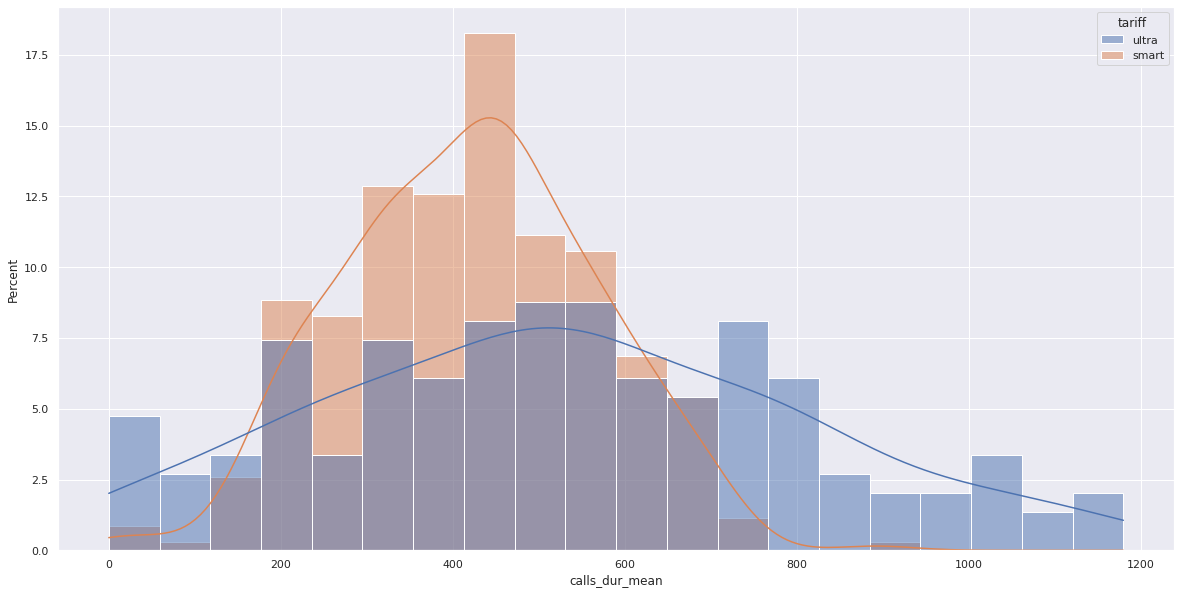

In [45]:
# задам стандартынй размер графика
sns.set(rc={'figure.figsize':(20,10)})

# так как имеем большую разницу объемов выборки, нормализую гистограммы
# независимо приму сумму столбцов каждой за 100% чтобы сравнить распределение
sns.histplot(
    data=calls_dur_pivot,
    x='calls_dur_mean',
    hue='tariff',
    kde=True,
    stat='percent',
    common_norm=False
)

In [46]:
# найду средние значения по тарифам, дисперсию и стандартное отклонение
display(
    'Средняя длительность разговора по тарифам, в месяц',
    calls_dur_pivot.groupby('tariff')['calls_dur_mean']
    .mean()
)

display(
    'Процентное соотношение средней длительности разговоров по тарифам, в месяц',
    calls_dur_pivot.groupby('tariff')['calls_dur_mean']
    .mean()
    .div(
        calls_dur_pivot.groupby('tariff')['calls_dur_mean']
        .mean()
        .sum()
    )
    .mul(100)
    .round()
)

display(
    'Дисперсия выборки для длительности разговоров по тарифам, в месяц',
    calls_dur_pivot.groupby('tariff')['calls_dur_mean'].var(ddof=1)
)

display(
    'Стандартное отклонение выборки для длительности разговоров по тарифам, в месяц',
    calls_dur_pivot.groupby('tariff')['calls_dur_mean'].std(ddof=1)
)

'Средняя длительность разговора по тарифам, в месяц'

tariff
smart    419.637747
ultra    528.216339
Name: calls_dur_mean, dtype: float64

'Процентное соотношение средней длительности разговоров по тарифам, в месяц'

tariff
smart    44.0
ultra    56.0
Name: calls_dur_mean, dtype: float64

'Дисперсия выборки для длительности разговоров по тарифам, в месяц'

tariff
smart    21031.740899
ultra    79378.358416
Name: calls_dur_mean, dtype: float64

'Стандартное отклонение выборки для длительности разговоров по тарифам, в месяц'

tariff
smart    145.023243
ultra    281.741652
Name: calls_dur_mean, dtype: float64

Соберу все значения продолжительности звонков в одну колонку и построю гистограмму продолжительности звонков в разбивке по тарифам.

In [47]:
calls_dur_melt = calls_dur_pivot.melt(id_vars=['user_id', 'tariff'], value_vars=calls_dur_pivot.iloc[:, 5:17])
calls_dur_melt

,user_id,tariff,variable,value
0,1000,ultra,calls_dur_01,NaN
1,1001,smart,calls_dur_01,NaN
2,1002,smart,calls_dur_01,NaN
3,1003,ultra,calls_dur_01,NaN
4,1004,ultra,calls_dur_01,NaN
...,...,...,...,...
5995,1495,ultra,calls_dur_12,1031.0
5996,1496,smart,calls_dur_12,518.0
5997,1497,smart,calls_dur_12,545.0
5998,1498,smart,calls_dur_12,NaN


<AxesSubplot:xlabel='value', ylabel='Percent'>

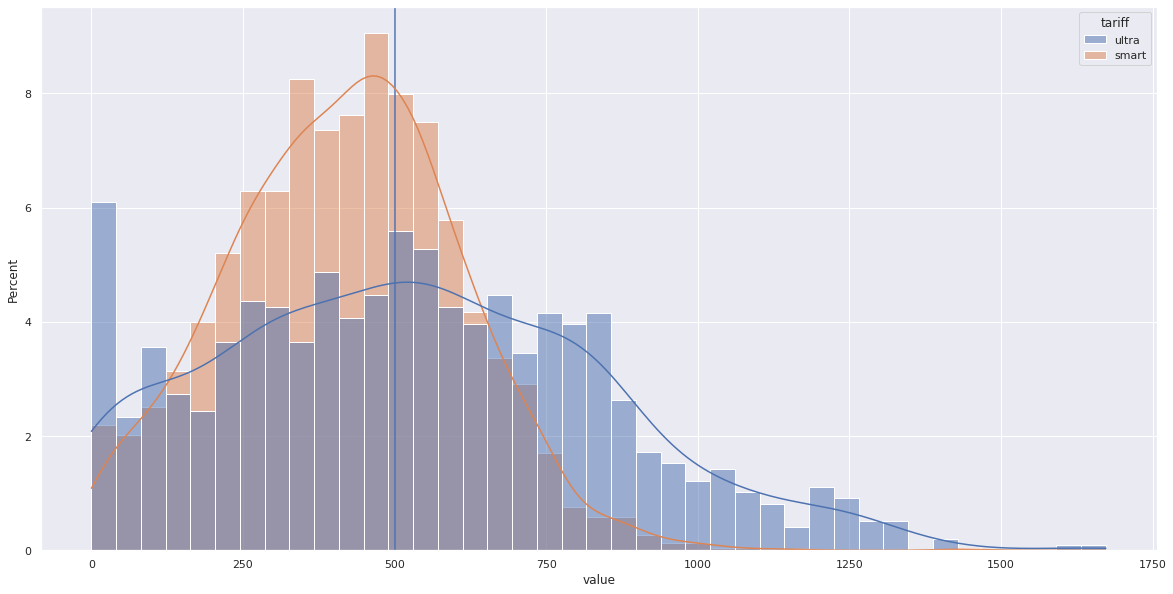

In [48]:
plt.axvline(x=500)

sns.histplot(
    data=calls_dur_melt,
    x='value',
    hue='tariff',
    kde=True,
    stat='percent',
    common_norm=False
)

In [49]:
# найду средние значения по тарифам, дисперсию и стандартное отклонение
display(
    'Средняя длительность разговора по тарифам, в месяц',
    calls_dur_pivot.groupby('tariff')['calls_dur_mean']
    .mean()
)

display(
    'Процентное соотношение средней длительности разговоров по тарифам, в месяц',
    calls_dur_pivot.groupby('tariff')['calls_dur_mean']
    .mean()
    .div(
        calls_dur_pivot.groupby('tariff')['calls_dur_mean']
        .mean()
        .sum()
    )
    .mul(100)
    .round()
)

display(
    'Дисперсия выборки для длительности разговоров по тарифам, в месяц',
    calls_dur_pivot.groupby('tariff')['calls_dur_mean'].var(ddof=1)
)

display(
    'Стандартное отклонение выборки для длительности разговоров по тарифам, в месяц',
    calls_dur_pivot.groupby('tariff')['calls_dur_mean'].std(ddof=1)
)

'Средняя длительность разговора по тарифам, в месяц'

tariff
smart    419.637747
ultra    528.216339
Name: calls_dur_mean, dtype: float64

'Процентное соотношение средней длительности разговоров по тарифам, в месяц'

tariff
smart    44.0
ultra    56.0
Name: calls_dur_mean, dtype: float64

'Дисперсия выборки для длительности разговоров по тарифам, в месяц'

tariff
smart    21031.740899
ultra    79378.358416
Name: calls_dur_mean, dtype: float64

'Стандартное отклонение выборки для длительности разговоров по тарифам, в месяц'

tariff
smart    145.023243
ultra    281.741652
Name: calls_dur_mean, dtype: float64

##### Ежемесячное количество звонков:

<AxesSubplot:xlabel='calls_count_mean', ylabel='Percent'>

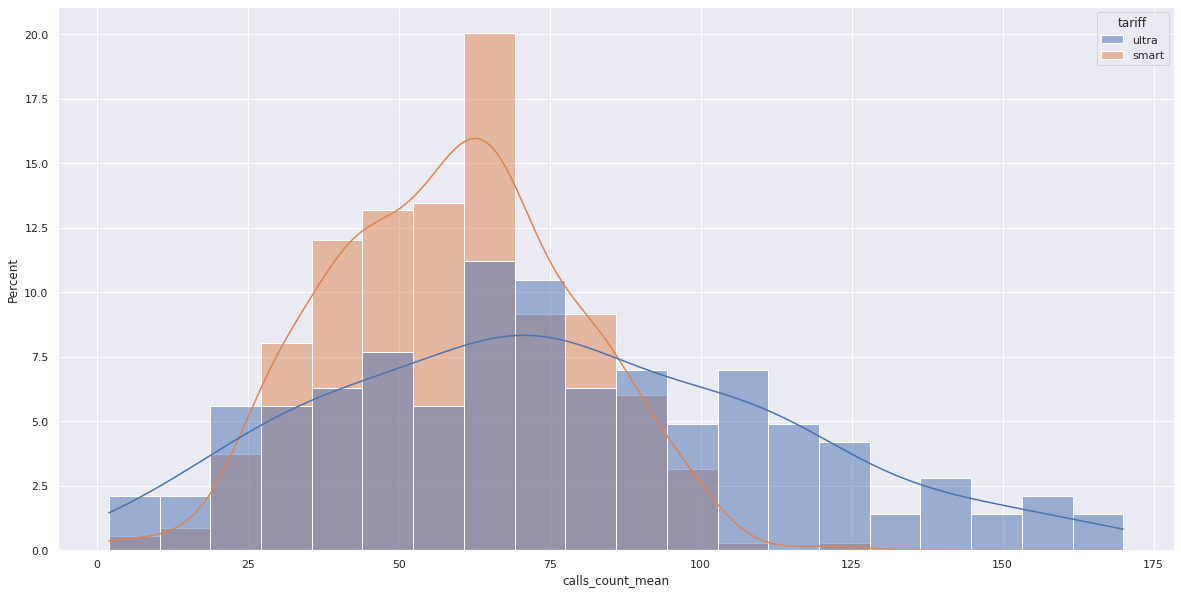

In [50]:
sns.histplot(
    data=calls_count_pivot,
    x='calls_count_mean',
    hue='tariff',
    kde=True,
    stat='percent',
    common_norm=False
)

In [51]:
display(
    'Среднее количество звонков по тарифам, в месяц',
    calls_count_pivot.groupby('tariff')['calls_count_mean']
    .mean()
)

display(
    'Процентное соотношение среднего количества звонков по тарифам, в месяц',
    calls_count_pivot.groupby('tariff')['calls_count_mean']
    .mean()
    .div(
        calls_count_pivot.groupby('tariff')['calls_count_mean']
        .mean()
        .sum()
    )
    .mul(100)
    .round()
)

display(
    'Дисперсия выборки для количества звонков по тарифам, в месяц',
    calls_count_pivot.groupby('tariff')['calls_count_mean'].var(ddof=1)
)

display(
    'Стандартное отклонение выборки для количества звонков по тарифам, в месяц',
    calls_count_pivot.groupby('tariff')['calls_count_mean'].std(ddof=1)
)

'Среднее количество звонков по тарифам, в месяц'

tariff
smart    58.820624
ultra    76.059188
Name: calls_count_mean, dtype: float64

'Процентное соотношение среднего количества звонков по тарифам, в месяц'

tariff
smart    44.0
ultra    56.0
Name: calls_count_mean, dtype: float64

'Дисперсия выборки для количества звонков по тарифам, в месяц'

tariff
smart     394.849846
ultra    1395.732621
Name: calls_count_mean, dtype: float64

'Стандартное отклонение выборки для количества звонков по тарифам, в месяц'

tariff
smart    19.870829
ultra    37.359505
Name: calls_count_mean, dtype: float64

Соберу все значения количества звонков в одну колонку и построю гистограмму количества звонков в разбивке по тарифам.

In [52]:
calls_count_melt = calls_count_pivot.melt(id_vars=['user_id', 'tariff'], value_vars=calls_count_pivot.iloc[:, 5:17])
calls_count_melt

,user_id,tariff,variable,value
0,1000,ultra,calls_count_01,NaN
1,1001,smart,calls_count_01,NaN
2,1002,smart,calls_count_01,NaN
3,1003,ultra,calls_count_01,NaN
4,1004,ultra,calls_count_01,NaN
...,...,...,...,...
5995,1495,ultra,calls_count_12,155.0
5996,1496,smart,calls_count_12,80.0
5997,1497,smart,calls_count_12,71.0
5998,1498,smart,calls_count_12,NaN


<AxesSubplot:xlabel='value', ylabel='Percent'>

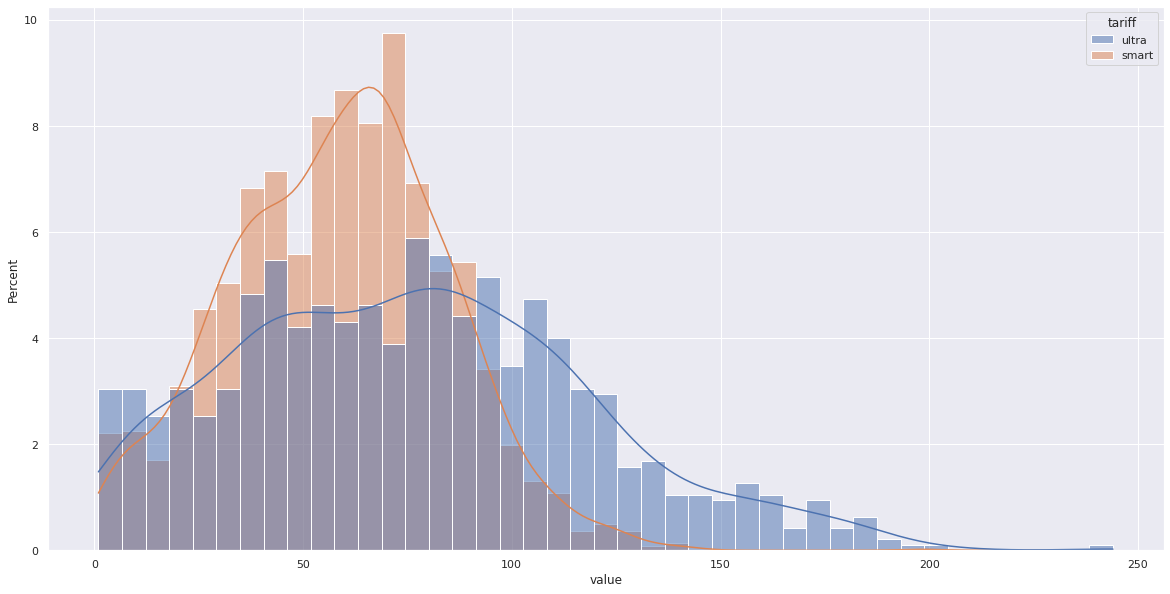

In [53]:
sns.histplot(
    data=calls_count_melt,
    x='value',
    hue='tariff',
    kde=True,
    stat='percent',
    common_norm=False
)

##### Ежемесячное количество сообщений:

<AxesSubplot:xlabel='sms_count_mean', ylabel='Percent'>

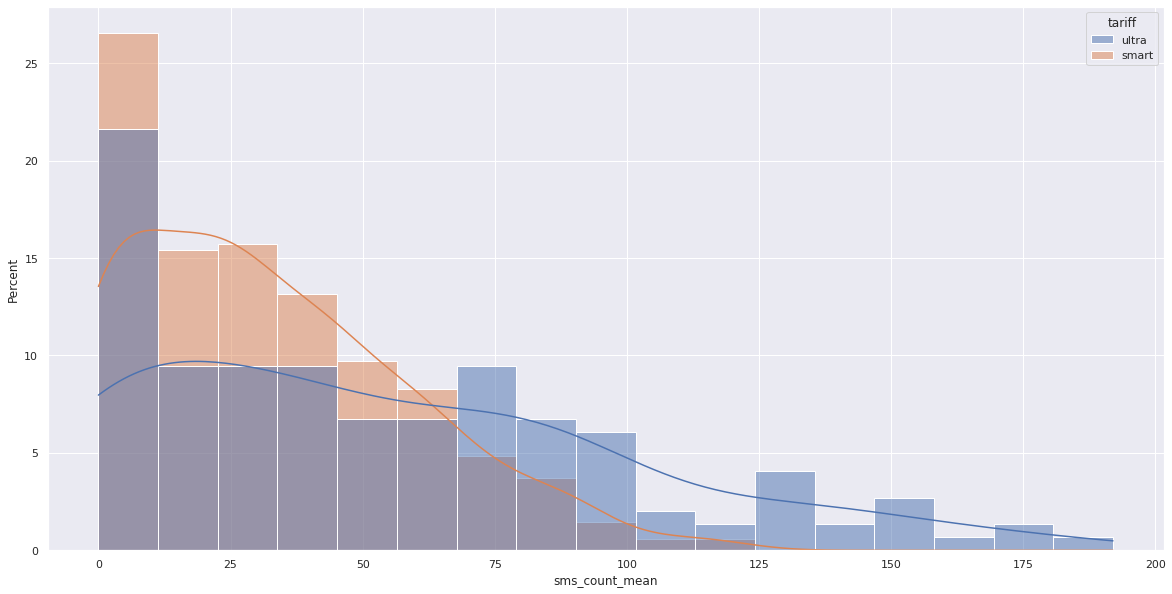

In [54]:
sns.histplot(
    data=sms_count_pivot,
    x='sms_count_mean',
    hue='tariff',
    kde=True,
    stat='percent',
    common_norm=False
)

In [55]:
display(
    'Среднее количество сообщений по тарифам, в месяц',
    sms_count_pivot.groupby('tariff')['sms_count_mean']
    .mean()
)

display(
    'Процентное соотношение среднего количества сообщений по тарифам, в месяц',
    sms_count_pivot.groupby('tariff')['sms_count_mean']
    .mean()
    .div(
        sms_count_pivot.groupby('tariff')['sms_count_mean']
        .mean()
        .sum()
    )
    .mul(100)
    .round()
)

display(
    'Дисперсия выборки для количества сообщений по тарифам, в месяц',
    sms_count_pivot.groupby('tariff')['sms_count_mean'].var(ddof=1)
)

display(
    'Стандартное отклонение выборки для количества сообщений по тарифам, в месяц',
    sms_count_pivot.groupby('tariff')['sms_count_mean'].std(ddof=1)
)

'Среднее количество сообщений по тарифам, в месяц'

tariff
smart    32.422380
ultra    54.087294
Name: sms_count_mean, dtype: float64

'Процентное соотношение среднего количества сообщений по тарифам, в месяц'

tariff
smart    37.0
ultra    63.0
Name: sms_count_mean, dtype: float64

'Дисперсия выборки для количества сообщений по тарифам, в месяц'

tariff
smart     700.138410
ultra    2145.423323
Name: sms_count_mean, dtype: float64

'Стандартное отклонение выборки для количества сообщений по тарифам, в месяц'

tariff
smart    26.460129
ultra    46.318715
Name: sms_count_mean, dtype: float64

Соберу все значения количества сообщений в одну колонку и построю гистограмму количества сообщений в разбивке по тарифам.

In [56]:
sms_count_melt = sms_count_pivot.melt(id_vars=['user_id', 'tariff'], value_vars=sms_count_pivot.iloc[:, 5:17])
sms_count_melt

,user_id,tariff,variable,value
0,1000,ultra,sms_count_01,NaN
1,1001,smart,sms_count_01,NaN
2,1002,smart,sms_count_01,NaN
3,1003,ultra,sms_count_01,NaN
4,1004,ultra,sms_count_01,NaN
...,...,...,...,...
5995,1495,ultra,sms_count_12,84.0
5996,1496,smart,sms_count_12,51.0
5997,1497,smart,sms_count_12,17.0
5998,1498,smart,sms_count_12,NaN


<AxesSubplot:xlabel='value', ylabel='Percent'>

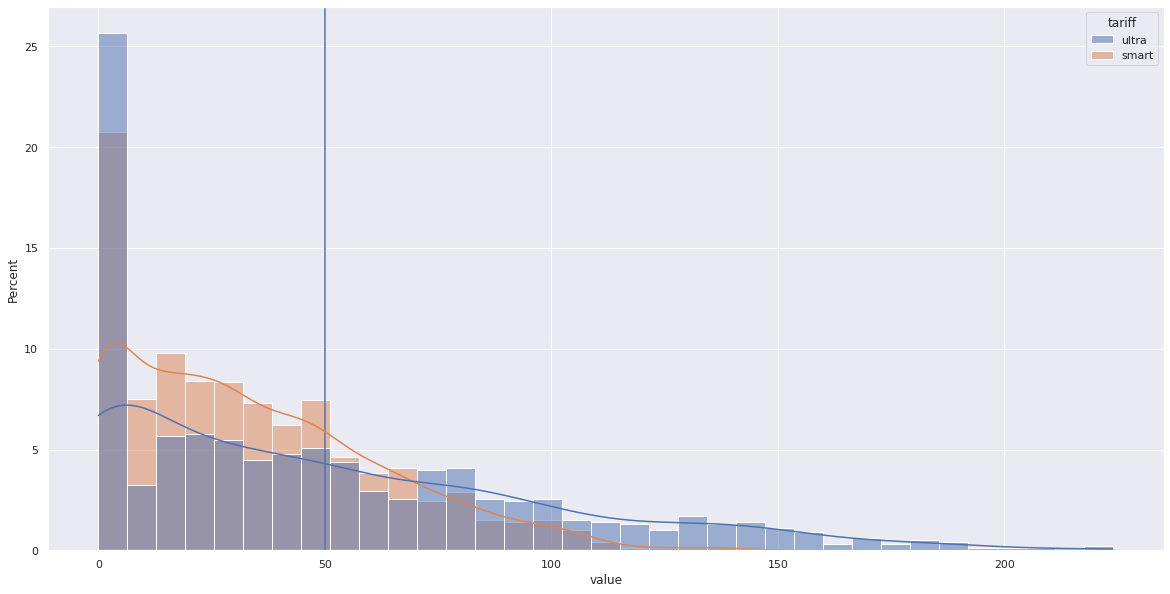

In [57]:
plt.axvline(x=50)

sns.histplot(
    data=sms_count_melt,
    x='value',
    hue='tariff',
    kde=True,
    stat='percent',
    common_norm=False
)

##### Ежемесячное потребление трафика:

<AxesSubplot:xlabel='gb_total_mean', ylabel='Percent'>

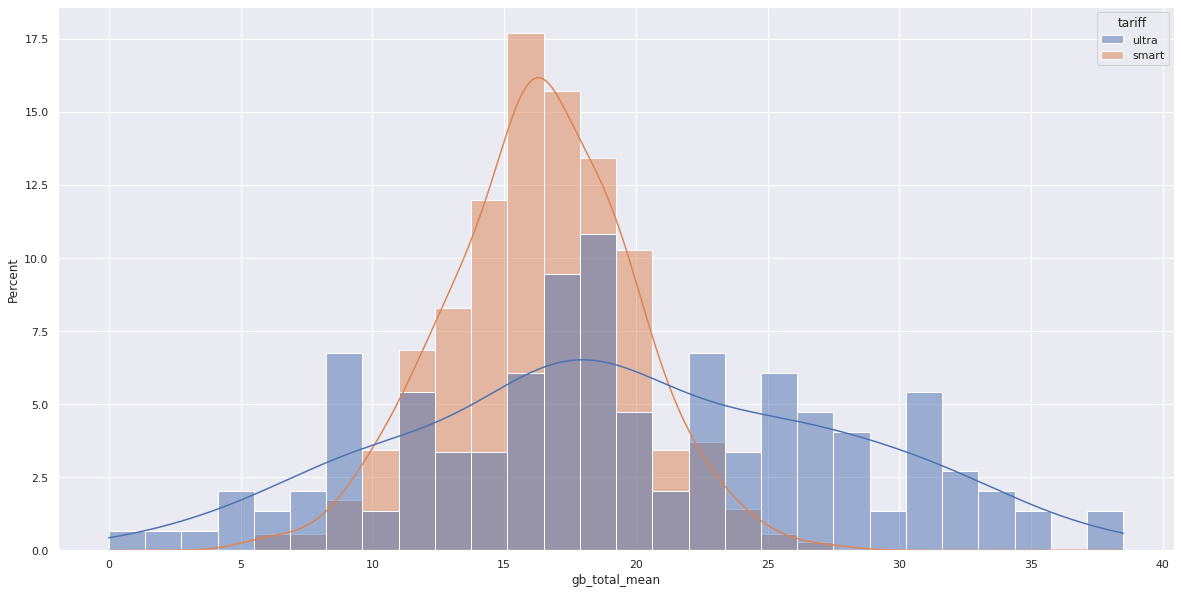

In [58]:
sns.histplot(
    data=gb_total_pivot,
    x='gb_total_mean',
    hue='tariff',
    kde=True,
    stat='percent',
    common_norm=False
)

In [59]:
display(
    'Среднее потребление Гб трафика по тарифам, в месяц',
    gb_total_pivot.groupby('tariff')['gb_total_mean']
    .mean()
)

display(
    'Процентное соотношение среднего потребления Гб трафика по тарифам, в месяц',
    gb_total_pivot.groupby('tariff')['gb_total_mean']
    .mean()
    .div(
        gb_total_pivot.groupby('tariff')['gb_total_mean']
        .mean()
        .sum()
    )
    .mul(100)
    .round()
)

display(
    'Дисперсия выборки для потребления Гб трафика по тарифам, в месяц',
    gb_total_pivot.groupby('tariff')['gb_total_mean'].var(ddof=1)
)

display(
    'Стандартное отклонение выборки для потребления Гб трафика по тарифам, в месяц',
    gb_total_pivot.groupby('tariff')['gb_total_mean'].std(ddof=1)
)

'Среднее потребление Гб трафика по тарифам, в месяц'

tariff
smart    16.318233
ultra    19.607440
Name: gb_total_mean, dtype: float64

'Процентное соотношение среднего потребления Гб трафика по тарифам, в месяц'

tariff
smart    45.0
ultra    55.0
Name: gb_total_mean, dtype: float64

'Дисперсия выборки для потребления Гб трафика по тарифам, в месяц'

tariff
smart    12.241758
ultra    65.731114
Name: gb_total_mean, dtype: float64

'Стандартное отклонение выборки для потребления Гб трафика по тарифам, в месяц'

tariff
smart    3.498822
ultra    8.107473
Name: gb_total_mean, dtype: float64

Соберу все значения количества потребленого трафика в одну колонку и построю гистограмму количества потребленого трафика в разбивке по тарифам.

In [60]:
gb_total_melt = gb_total_pivot.melt(id_vars=['user_id', 'tariff'], value_vars=gb_total_pivot.iloc[:, 5:17])
gb_total_melt

,user_id,tariff,variable,value
0,1000,ultra,gb_total_01,NaN
1,1001,smart,gb_total_01,NaN
2,1002,smart,gb_total_01,NaN
3,1003,ultra,gb_total_01,NaN
4,1004,ultra,gb_total_01,NaN
...,...,...,...,...
5995,1495,ultra,gb_total_12,23.0
5996,1496,smart,gb_total_12,21.0
5997,1497,smart,gb_total_12,20.0
5998,1498,smart,gb_total_12,NaN


<AxesSubplot:xlabel='value', ylabel='Percent'>

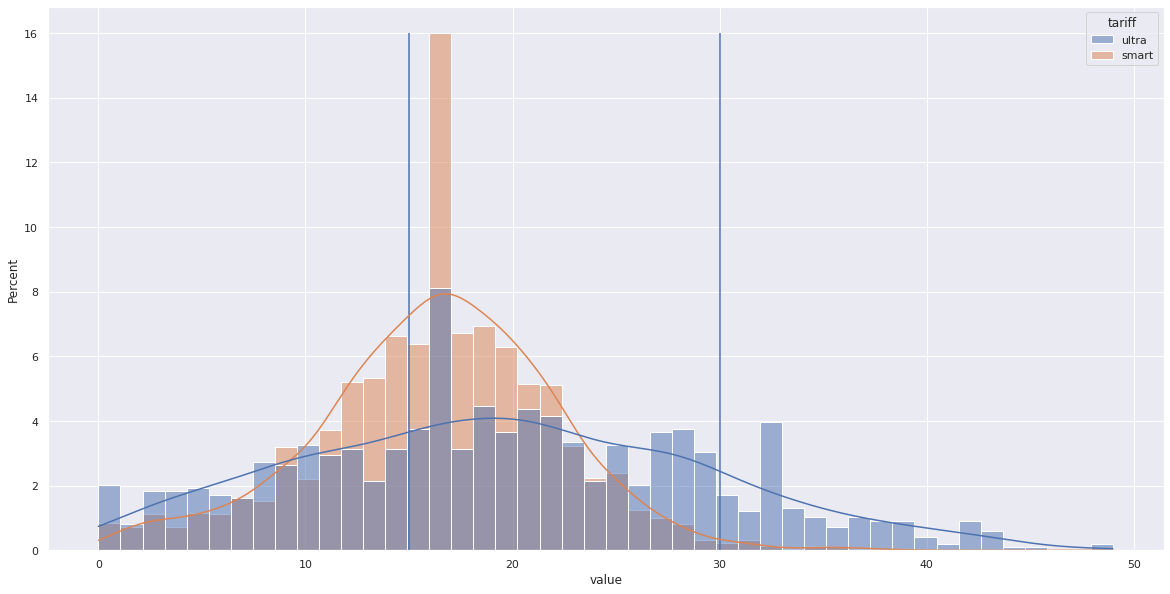

In [61]:
plt.vlines(x=[15, 30], ymin=0, ymax=16)

sns.histplot(
    data=gb_total_melt,
    x='value',
    hue='tariff',
    kde=True,
    stat='percent',
    common_norm=False
)

#### 3.1.1 Вывод:

Для тарифа "Смарт" характерны высокие пики в районе лимита предоплаченных услуг входящих в тарифный план. Количество пользователей вышедших за лимит стремительно уменьшается. Тем не менее пользователи тарифа "Смарт" более склонны выходить за пределы установленные тарифным планом.  
Особенно это касается интернет трафика. Среднее потребление пользователей тарифа "Смарт" превышает установленное тарифным планом порогове значение в 15 Гб и составлляет 16.31 Гб. Также пользователи тарифа "Смарт" часто выходят за лимиты потребления иных услуг.

Для тарифа "Ультра" характерно более равномерное распределение потребления услуг. Пик не имеет яркой выраженности, но потребление услуг достигает пика примерно на тех же значениях что и у пользователей тарифа "Смарт". Тем не менее, заметна значительная гурппа пользователей использующая большее количество услуг чем пользователи тарифа "Смарт".  
Пользователям тарифа "Ультра" не свойственен выход за установленные тарифным планом предоплаченные значения длительности звонков и количества сообщений. Отдельные пользователи тарифа "Ультра" могут выйти за пределы потребления предоплаченного интернет трафика.

Пользователи тарифа "Ультра" в среднем совершают звонки чаще и разговаривают дольше чем пользователи тарифа "Смарт". 76 звонков против 58, 546 минут против 420.  
Пользователи тарифа "Ультра" отправляют больше сообщений, 64 против 37. Но пик количества сообщений смещен влево - вероятно, большая часть пользователей не использует их как один из основных методов общения.

Пользователи тарифов "Смарт" и "Ультра" в среднем потребляют 16.3 и 19.7 Гб трафика соответственно. Важно учитывать равномерное распределение потребления пользователями тарифа "Ультра". Пользователи тарифа "Смарт" стремятся ограничить потребление по мере достижения ежемесячного лимита, пользователи тарифа "Ультра" используют столько трафика сколько им требуется.

#### 3.1.2 Анализ выручки в зависимости от тарифного плана:

##### **Средняя выручка за использование минут сверх установленного тарифным планом лимита:**

<AxesSubplot:xlabel='calls_dur_revenue_mean', ylabel='Percent'>

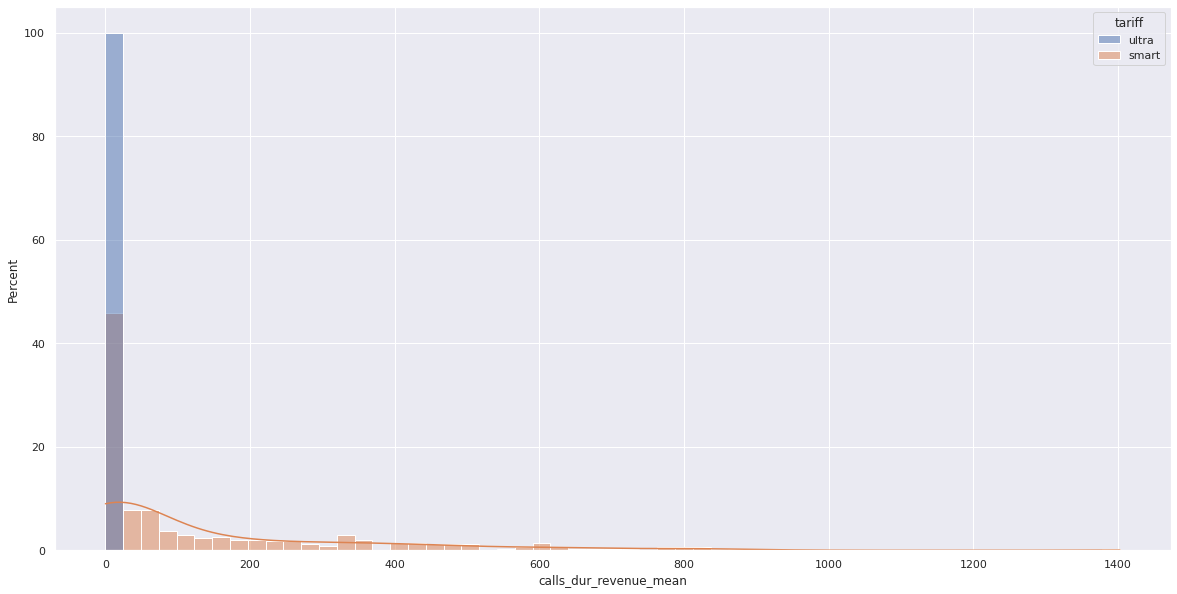

In [62]:
sns.histplot(
    data=calls_dur_revenue,
    x='calls_dur_revenue_mean',
    hue='tariff',
    kde=True,
    stat='percent',
    common_norm=False
)

In [63]:
display(
    'Средняя выручка за использование минут сверх установленного тарифным планом лимита, в месяц',
    calls_dur_revenue.groupby('tariff')['calls_dur_revenue_mean']
    .mean()
)

display(
    'Процентное соотношение cредней выручки за использование минут сверх установленного тарифным планом лимита по тарифам, в месяц',
    calls_dur_revenue.groupby('tariff')['calls_dur_revenue_mean']
    .mean()
    .div(
        calls_dur_revenue.groupby('tariff')['calls_dur_revenue_mean']
        .mean()
        .sum()
    )
    .mul(100)
    .round()
)

display(
    'Дисперсия выборки для cредней выручка за использование минут сверх установленного тарифным планом лимита по тарифам, в месяц',
    calls_dur_revenue.groupby('tariff')['calls_dur_revenue_mean'].var(ddof=1)
)

display(
    'Стандартное отклонение выборки для cредней выручка за использование минут сверх установленного тарифным планом лимита по тарифам, в месяц',
    calls_dur_revenue.groupby('tariff')['calls_dur_revenue_mean'].std(ddof=1)
)

'Средняя выручка за использование минут сверх установленного тарифным планом лимита, в месяц'

tariff
smart    137.614861
ultra      0.000000
Name: calls_dur_revenue_mean, dtype: float64

'Процентное соотношение cредней выручки за использование минут сверх установленного тарифным планом лимита по тарифам, в месяц'

tariff
smart    100.0
ultra      0.0
Name: calls_dur_revenue_mean, dtype: float64

'Дисперсия выборки для cредней выручка за использование минут сверх установленного тарифным планом лимита по тарифам, в месяц'

tariff
smart    44326.875122
ultra        0.000000
Name: calls_dur_revenue_mean, dtype: float64

'Стандартное отклонение выборки для cредней выручка за использование минут сверх установленного тарифным планом лимита по тарифам, в месяц'

tariff
smart    210.539486
ultra      0.000000
Name: calls_dur_revenue_mean, dtype: float64

##### **Средняя выручка за использование сообщений сверх установленного тарифным планом лимита:**

<AxesSubplot:xlabel='sms_count_revenue_mean', ylabel='Percent'>

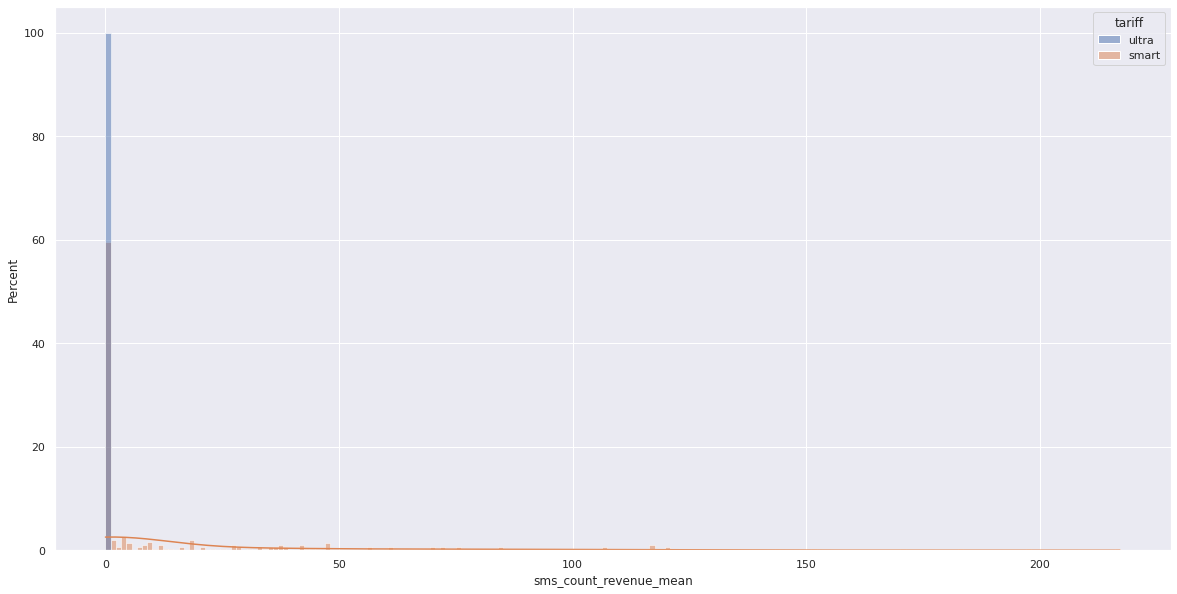

In [64]:
sns.histplot(
    data=sms_count_revenue,
    x='sms_count_revenue_mean',
    hue='tariff',
    kde=True,
    stat='percent',
    common_norm=False
)

In [65]:
display(
    'Средняя выручка за использование сообщений сверх установленного тарифным планом лимита, в месяц',
    sms_count_revenue.groupby('tariff')['sms_count_revenue_mean']
    .mean()
)

display(
    'Процентное соотношение cредней выручки за использование сообщений сверх установленного тарифным планом лимита по тарифам, в месяц',
    sms_count_revenue.groupby('tariff')['sms_count_revenue_mean']
    .mean()
    .div(
        sms_count_revenue.groupby('tariff')['sms_count_revenue_mean']
        .mean()
        .sum()
    )
    .mul(100)
    .round()
)

display(
    'Дисперсия выборки для cредней выручка за использование сообщений сверх установленного тарифным планом лимита по тарифам, в месяц',
    sms_count_revenue.groupby('tariff')['sms_count_revenue_mean'].var(ddof=1)
)

display(
    'Стандартное отклонение выборки для cредней выручка за использование сообщений сверх установленного тарифным планом лимита по тарифам, в месяц',
    sms_count_revenue.groupby('tariff')['sms_count_revenue_mean'].std(ddof=1)
)

'Средняя выручка за использование сообщений сверх установленного тарифным планом лимита, в месяц'

tariff
smart    20.442384
ultra     0.000000
Name: sms_count_revenue_mean, dtype: float64

'Процентное соотношение cредней выручки за использование сообщений сверх установленного тарифным планом лимита по тарифам, в месяц'

tariff
smart    100.0
ultra      0.0
Name: sms_count_revenue_mean, dtype: float64

'Дисперсия выборки для cредней выручка за использование сообщений сверх установленного тарифным планом лимита по тарифам, в месяц'

tariff
smart    1527.527449
ultra       0.000000
Name: sms_count_revenue_mean, dtype: float64

'Стандартное отклонение выборки для cредней выручка за использование сообщений сверх установленного тарифным планом лимита по тарифам, в месяц'

tariff
smart    39.083596
ultra     0.000000
Name: sms_count_revenue_mean, dtype: float64

##### **Средняя выручка за использование трафика сверх установленного тарифным планом лимита:**

<AxesSubplot:xlabel='gb_total_revenue_mean', ylabel='Percent'>

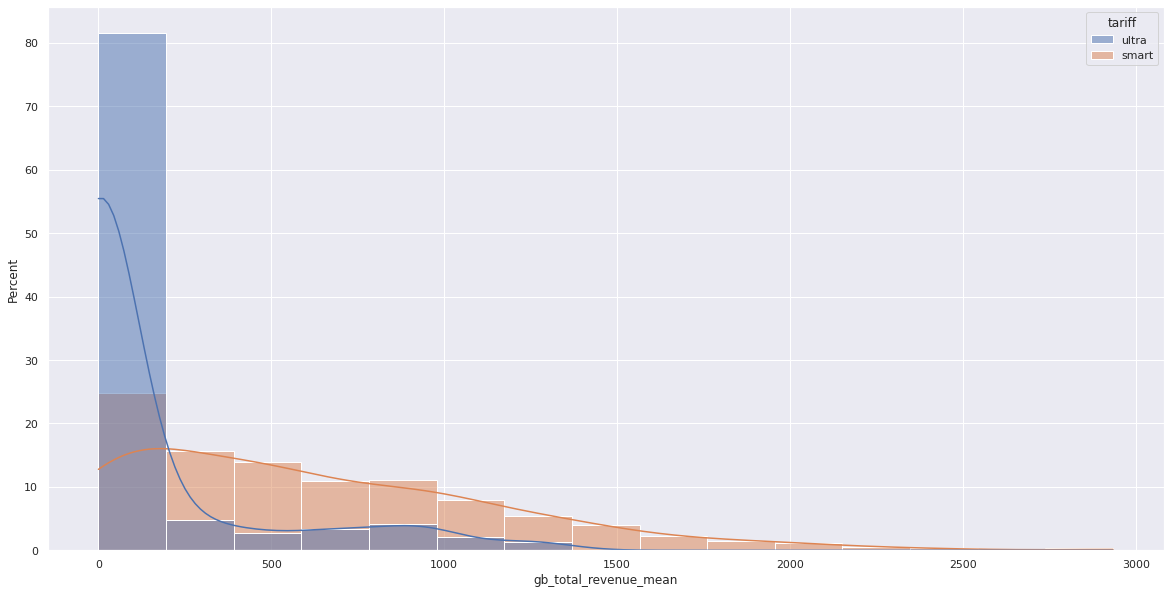

In [66]:
sns.histplot(
    data=gb_total_revenue,
    x='gb_total_revenue_mean',
    hue='tariff',
    kde=True,
    stat='percent',
    common_norm=False
)

In [67]:
display(
    'Средняя выручка за использование трафика сверх установленного тарифным планом лимита, в месяц',
    gb_total_revenue.groupby('tariff')['gb_total_revenue_mean']
    .mean()
)

display(
    'Процентное соотношение cредней выручки за использование трафика сверх установленного тарифным планом лимита по тарифам, в месяц',
    gb_total_revenue.groupby('tariff')['gb_total_revenue_mean']
    .mean()
    .div(
        gb_total_revenue.groupby('tariff')['gb_total_revenue_mean']
        .mean()
        .sum()
    )
    .mul(100)
    .round()
)

display(
    'Дисперсия выборки для cредней выручка за использование трафика сверх установленного тарифным планом лимита по тарифам, в месяц',
    gb_total_revenue.groupby('tariff')['gb_total_revenue_mean'].var(ddof=1)
)

display(
    'Стандартное отклонение выборки для cредней выручка за использование трафика сверх установленного тарифным планом лимита по тарифам, в месяц',
    gb_total_revenue.groupby('tariff')['gb_total_revenue_mean'].std(ddof=1)
)

'Средняя выручка за использование трафика сверх установленного тарифным планом лимита, в месяц'

tariff
smart    619.797629
ultra    137.392990
Name: gb_total_revenue_mean, dtype: float64

'Процентное соотношение cредней выручки за использование трафика сверх установленного тарифным планом лимита по тарифам, в месяц'

tariff
smart    82.0
ultra    18.0
Name: gb_total_revenue_mean, dtype: float64

'Дисперсия выборки для cредней выручка за использование трафика сверх установленного тарифным планом лимита по тарифам, в месяц'

tariff
smart    286907.719137
ultra     89603.788389
Name: gb_total_revenue_mean, dtype: float64

'Стандартное отклонение выборки для cредней выручка за использование трафика сверх установленного тарифным планом лимита по тарифам, в месяц'

tariff
smart    535.637675
ultra    299.338919
Name: gb_total_revenue_mean, dtype: float64

##### **Средняя выручка за использование всех услуг сверх установленного тарифным планом лимита:**

<AxesSubplot:xlabel='revenue_service_mean', ylabel='Percent'>

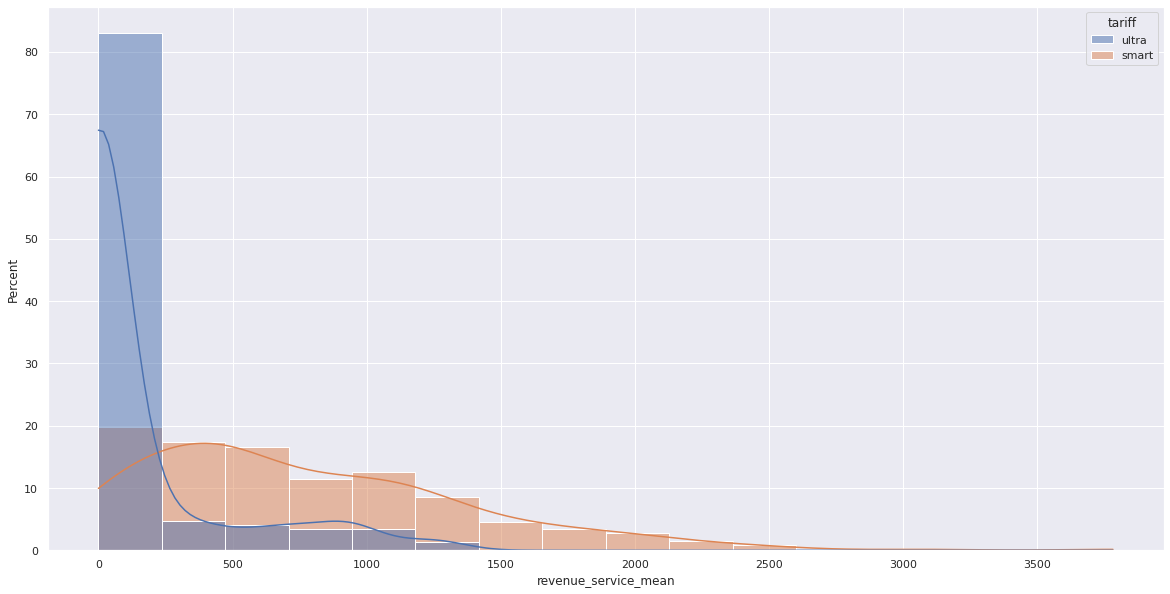

In [68]:
sns.histplot(
    data=revenue_service,
    x='revenue_service_mean',
    hue='tariff',
    kde=True,
    stat='percent',
    common_norm=False
)

In [69]:
display(
    'Средняя выручка за использование всех услуг сверх установленного тарифным планом лимита, в месяц',
    revenue_service.groupby('tariff')['revenue_service_mean']
    .mean()
)

display(
    'Процентное соотношение cредней выручки за использование всех услуг сверх установленного тарифным планом лимита по тарифам, в месяц',
    revenue_service.groupby('tariff')['revenue_service_mean']
    .mean()
    .div(
        revenue_service.groupby('tariff')['revenue_service_mean']
        .mean()
        .sum()
    )
    .mul(100)
    .round()
)

display(
    'Дисперсия выборки для cредней выручка за использование всех услуг сверх установленного тарифным планом лимита по тарифам, в месяц',
    revenue_service.groupby('tariff')['revenue_service_mean'].var(ddof=1)
)

display(
    'Стандартное отклонение выборки для cредней выручка за использование всех услуг сверх установленного тарифным планом лимита по тарифам, в месяц',
    revenue_service.groupby('tariff')['revenue_service_mean'].std(ddof=1)
)

'Средняя выручка за использование всех услуг сверх установленного тарифным планом лимита, в месяц'

tariff
smart    774.401019
ultra    136.464659
Name: revenue_service_mean, dtype: float64

'Процентное соотношение cредней выручки за использование всех услуг сверх установленного тарифным планом лимита по тарифам, в месяц'

tariff
smart    85.0
ultra    15.0
Name: revenue_service_mean, dtype: float64

'Дисперсия выборки для cредней выручка за использование всех услуг сверх установленного тарифным планом лимита по тарифам, в месяц'

tariff
smart    367285.150014
ultra     89121.784981
Name: revenue_service_mean, dtype: float64

'Стандартное отклонение выборки для cредней выручка за использование всех услуг сверх установленного тарифным планом лимита по тарифам, в месяц'

tariff
smart    606.040551
ultra    298.532720
Name: revenue_service_mean, dtype: float64

##### **Средняя ежемесячная выручка с учетом абонентской платы:**

<AxesSubplot:xlabel='revenue_total_mean', ylabel='Percent'>

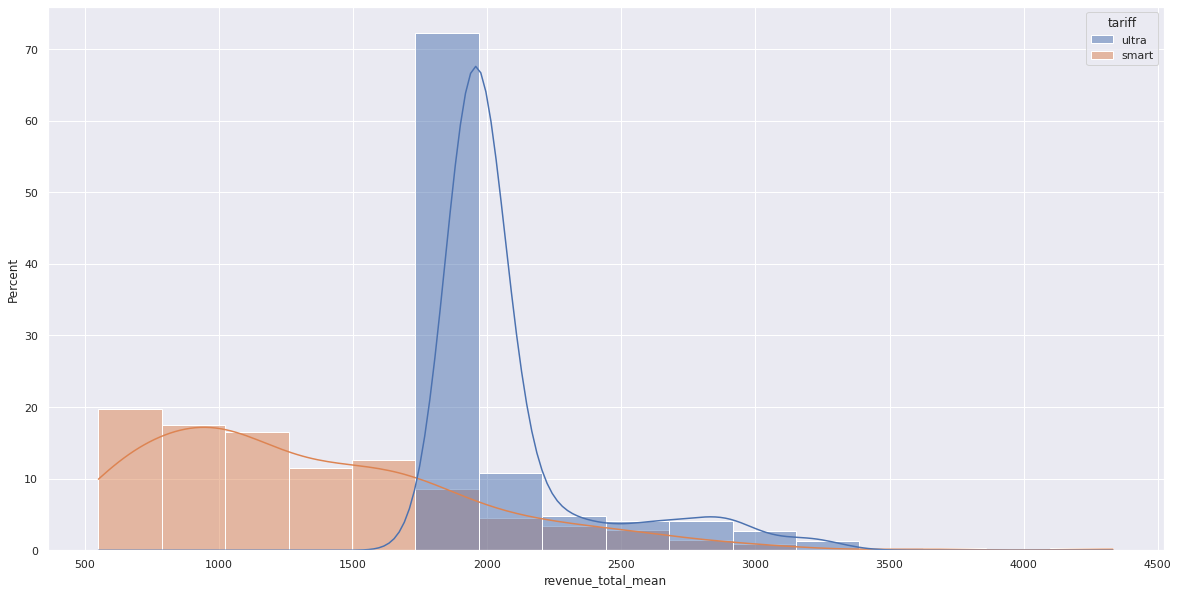

In [70]:
sns.histplot(
    data=revenue_total,
    x='revenue_total_mean',
    hue='tariff',
    kde=True,
    stat='percent',
    common_norm=False
)

In [71]:
display(
    'Средняя ежемесячная выручка с учетом абонентской платы, в месяц',
    revenue_total.groupby('tariff')['revenue_total_mean']
    .mean()
)

display(
    'Процентное соотношение cредней ежемесячной выручки с учетом абонентской платы, в месяц',
    revenue_total.groupby('tariff')['revenue_total_mean']
    .mean()
    .div(
        revenue_total.groupby('tariff')['revenue_total_mean']
        .mean()
        .sum()
    )
    .mul(100)
    .round()
)

display(
    'Дисперсия выборки для cредней ежемесячной выручки с учетом абонентской платы, в месяц',
    revenue_total.groupby('tariff')['revenue_total_mean'].var(ddof=1)
)

display(
    'Стандартное отклонение выборки для cредней ежемесячной выручки с учетом абонентской платы, в месяц',
    revenue_total.groupby('tariff')['revenue_total_mean'].std(ddof=1)
)

'Средняя ежемесячная выручка с учетом абонентской платы, в месяц'

tariff
smart    1324.401019
ultra    2086.464659
Name: revenue_total_mean, dtype: float64

'Процентное соотношение cредней ежемесячной выручки с учетом абонентской платы, в месяц'

tariff
smart    39.0
ultra    61.0
Name: revenue_total_mean, dtype: float64

'Дисперсия выборки для cредней ежемесячной выручки с учетом абонентской платы, в месяц'

tariff
smart    367285.150014
ultra     89121.784981
Name: revenue_total_mean, dtype: float64

'Стандартное отклонение выборки для cредней ежемесячной выручки с учетом абонентской платы, в месяц'

tariff
smart    606.040551
ultra    298.532720
Name: revenue_total_mean, dtype: float64

Рассчитаю среднюю выручку абонентов из Москвы и из остальных городов.

In [72]:
display(
    'Средняя ежемесячная выручка абонентов из Москвы, в месяц',
    revenue_total.query('city == "Москва"')['revenue_total_mean']
    .mean()
)

display(
    'Средняя ежемесячная выручка абонентов из других городов, в месяц',
    revenue_total.query('city != "Москва"')['revenue_total_mean']
    .mean()
)

'Средняя ежемесячная выручка абонентов из Москвы, в месяц'

1498.465851152215

'Средняя ежемесячная выручка абонентов из других городов, в месяц'

1563.8822229636141

#### 3.1.2 Вывод:

Средняя ежемесячная выручка пользователей тарифа "Ультра" составляет 2086 рублей.  
Средняя ежемесячная выручка пользователей тарифа "Смарт" составляет 1324 рубля.

Средняя ежемесячная выручка абонентов из Москвы составляет 1498 рублей.  
Средняя ежемесячная выручка абонентов из других городов составляет 1563 рубля.

Основная масса выручки тарифа "Ультра" достигается за счет абонентской платы. Пользователи тарифа "Ультра" практически не выходят за рамки предоплаченных лимитов длительности разговора и сообщений, поэтому сумма выручки свыше 1950 рублей достигается только за счет редких пользователей выходящих за лимит потребления трафика, среднее потребление в 136 рублей.

Основная масса выручки тарифа "Смарт" достигается за счет взимания платы за услуги оказанные сверх предоплаченных лимитов. При абонентской плате 550 рублей, среднее потребление услуг обходится пользователям тарифа "Смарт" в 774 рубля.

### 3.2 Дополнительно: анализ потребления услуг клиентами и выручки в зависимости от пола и возрастной группы:

Дополнительный анализ выполнен поверхностно, из личного интереса, и не будет исопльзован при формировании вывода, так как при группировке текущей выборки одновременно по двум и более параметрам, получившиеся гурппы могут оказаться недостаточными для репрезентативного представления данных.

In [73]:
display(
    'Средняя продолжительность разговора с учетом пола абонента, в месяц',
    calls_dur_pivot.groupby(calls_dur_pivot[['tariff', 'sex']].apply(tuple, axis=1))['calls_dur_mean']
    .mean()
)

display(
    'Среднее количество сообщений с учетом пола абонента, в месяц',
    sms_count_pivot.groupby(calls_dur_pivot[['tariff', 'sex']].apply(tuple, axis=1))['sms_count_mean']
    .mean()
)

display(
    'Среднее потребление трафика с учетом пола абонента, в месяц',
    gb_total_pivot.groupby(gb_total_pivot[['tariff', 'sex']].apply(tuple, axis=1))['gb_total_mean']
    .mean()
)

display(
    'Средняя выручка с учетом пола абонента, в месяц',
    revenue_total.groupby(revenue_total[['tariff', 'sex']].apply(tuple, axis=1))['revenue_total_mean']
    .mean()
)

'Средняя продолжительность разговора с учетом пола абонента, в месяц'

(smart, f)    420.212072
(smart, m)    419.069947
(ultra, f)    512.117476
(ultra, m)    548.773348
Name: calls_dur_mean, dtype: float64

'Среднее количество сообщений с учетом пола абонента, в месяц'

(smart, f)    30.838150
(smart, m)    33.988607
(ultra, f)    55.255924
(ultra, m)    52.595043
Name: sms_count_mean, dtype: float64

'Среднее потребление трафика с учетом пола абонента, в месяц'

(smart, f)    16.088110
(smart, m)    16.545742
(ultra, f)    19.495986
(ultra, m)    19.749757
Name: gb_total_mean, dtype: float64

'Средняя выручка с учетом пола абонента, в месяц'

(smart, f)    1279.605584
(smart, m)    1368.687416
(ultra, f)    2064.555104
(ultra, m)    2114.441475
Name: revenue_total_mean, dtype: float64

*Разбиваем стереорипы. ;-p*

In [74]:
display(
    'Средняя продолжительность разговора с учетом возраста абонента, в месяц',
    calls_dur_pivot.groupby(calls_dur_pivot[['tariff', 'age']].apply(tuple, axis=1))['calls_dur_mean']
    .mean()
)

display(
    'Среднее количество сообщений с учетом возраста абонента, в месяц',
    sms_count_pivot.groupby(calls_dur_pivot[['tariff', 'age']].apply(tuple, axis=1))['sms_count_mean']
    .mean()
)

display(
    'Среднее потребление трафика с учетом возраста абонента, в месяц',
    gb_total_pivot.groupby(gb_total_pivot[['tariff', 'age']].apply(tuple, axis=1))['gb_total_mean']
    .mean()
)

display(
    'Средняя выручка с учетом возраста абонента, в месяц',
    revenue_total.groupby(revenue_total[['tariff', 'age']].apply(tuple, axis=1))['revenue_total_mean']
    .mean()
)

'Средняя продолжительность разговора с учетом возраста абонента, в месяц'

(smart, 18-35)    411.279341
(smart, 36-55)    415.616751
(smart, 56+)      431.329477
(ultra, 18-35)    492.489086
(ultra, 36-55)    538.799535
(ultra, 56+)      547.133579
Name: calls_dur_mean, dtype: float64

'Среднее количество сообщений с учетом возраста абонента, в месяц'

(smart, 18-35)    31.333738
(smart, 36-55)    33.545807
(smart, 56+)      32.144481
(ultra, 18-35)    74.440310
(ultra, 36-55)    39.819496
(ultra, 56+)      52.033987
Name: sms_count_mean, dtype: float64

'Среднее потребление трафика с учетом возраста абонента, в месяц'

(smart, 18-35)    16.458967
(smart, 36-55)    16.292122
(smart, 56+)      16.223934
(ultra, 18-35)    19.832935
(ultra, 36-55)    19.142446
(ultra, 56+)      19.909663
Name: gb_total_mean, dtype: float64

'Средняя выручка с учетом возраста абонента, в месяц'

(smart, 18-35)    1326.648288
(smart, 36-55)    1333.608158
(smart, 56+)      1312.373990
(ultra, 18-35)    2091.144418
(ultra, 36-55)    2087.020503
(ultra, 56+)      2081.930439
Name: revenue_total_mean, dtype: float64

## Шаг 4. Статистический анализ данных - проверка гипотез

*Проверьте гипотезы:*  
- *средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;*  
- *средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.*

*Пороговое значение alpha задайте самостоятельно.* 

*Поясните:*  
- *как вы формулировали нулевую и альтернативную гипотезы;*  
- *какой критерий использовали для проверки гипотез и почему.*

### 4.1 Проверка гипотезы - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается:

Нулевая гиптотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются.  
Альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.  
Критический уровень статистической значимости приму равным 5%.

Сравнение средней выручки.

In [75]:
# Подготовлю массивы
smart_revenue = revenue_total.query('tariff == "smart"')['revenue_total_mean']

print(smart_revenue.isna().sum())
smart_revenue = smart_revenue.dropna()

ultra_revenue = revenue_total.query('tariff == "ultra"')['revenue_total_mean']

print(ultra_revenue.isna().sum())
ultra_revenue = ultra_revenue.dropna()

1
1


In [76]:
# задам альфу равной 5%
alpha = .05

# из расчетов исследовательского анализа видно то дисперсия значительно отличается, к тому же выборки разного размера - equal_var=False
results = st.ttest_ind(
    smart_revenue,
    ultra_revenue,
    equal_var=False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.084961899583595e-59
Отвергаем нулевую гипотезу


Сравнение выручки.

In [77]:
revenue_grouped = revenue_total.melt(id_vars=['user_id', 'tariff', 'city'], value_vars=revenue_total.iloc[:, 5:17])
revenue_grouped

,user_id,tariff,city,variable,value
0,1000,ultra,Краснодар,revenue_01,NaN
1,1001,smart,Москва,revenue_01,NaN
2,1002,smart,Стерлитамак,revenue_01,NaN
3,1003,ultra,Москва,revenue_01,NaN
4,1004,ultra,Новокузнецк,revenue_01,NaN
...,...,...,...,...,...
5995,1495,ultra,Иркутск,revenue_12,1950.0
5996,1496,smart,Вологда,revenue_12,1807.0
5997,1497,smart,Челябинск,revenue_12,1685.0
5998,1498,smart,Владикавказ,revenue_12,NaN


In [78]:
# Подготовлю массивы
smart_revenue = revenue_grouped.query('tariff == "smart"')['value']

print(smart_revenue.isna().sum())
smart_revenue = smart_revenue.dropna()

ultra_revenue = revenue_grouped.query('tariff == "ultra"')['value']

print(ultra_revenue.isna().sum())
ultra_revenue = ultra_revenue.dropna()

1983
803


In [79]:
# задам альфу равной 5%
alpha = .05

# из расчетов исследовательского анализа видно то дисперсия значительно отличается, к тому же выборки разного размера - equal_var=False
results = st.ttest_ind(
    smart_revenue,
    ultra_revenue,
    equal_var=False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


### 4.1 Вывод:

На имеющихся данных, на уровне значимости 5%, есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

### 4.2 Проверка гипотезы - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов:

Нулевая гиптотеза: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.  
Альтернативная гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.  
Критический уровень статистической значимости приму равным 5%.

Сравнение средней выручки.

In [80]:
# Подготовлю массивы
moscow_revenue = revenue_total.query('city == "Москва"')['revenue_total_mean']

print(moscow_revenue.isna().sum())
moscow_revenue = moscow_revenue.dropna()

cities_revenue = revenue_total.query('city != "Москва"')['revenue_total_mean']

print(cities_revenue.isna().sum())
cities_revenue = cities_revenue.dropna()

0
2


In [81]:
# задам альфу равной 5%
alpha = .05

# выборки разного размера, так как только около одной пятой абонентов из Моксвы - equal_var=False
results = st.ttest_ind(
    moscow_revenue,
    cities_revenue,
    equal_var=False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.3443090581027025
Не получилось отвергнуть нулевую гипотезу


Сравнение выручки.

In [82]:
# Подготовлю массивы
moscow_revenue = revenue_grouped.query('city == "Москва"')['value']

print(moscow_revenue.isna().sum())
moscow_revenue = moscow_revenue.dropna()

cities_revenue = revenue_grouped.query('city != "Москва"')['value']

print(cities_revenue.isna().sum())
cities_revenue = cities_revenue.dropna()

577
2209


In [83]:
# задам альфу равной 5%
alpha = .05

# выборки разного размера, так как только около одной пятой абонентов из Моксвы - equal_var=False
results = st.ttest_ind(
    moscow_revenue,
    cities_revenue,
    equal_var=False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


### 4.2 Вывод:

На имеющихся данных, на уровне значимости 5%, нет оснований отвергнуть нулевую гипотезу в пользу альтернативы. Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

## Шаг 5. Общий вывод

По итогам исследования следует обратить внимание на следующие выявленные особенности:
В выборку из 500 пользователей попал 351 пользователь тарифа "Смарт" и 149 пользователей тарифа "Ультра" - вероятно тариф "Смарт" более популярен, пользователей привлекает низкая абонентская плата.  
При этом пользователи тарифа "Смарт", при абонентской плате 550 рублей, в среднем платят 774 рубля в месяц за превышение предоплаченного лимита услуг. В основном это интернет трафик.

Пользователи тарифа "Ультра" не выходят за предоплаченные лимиты потребления минут и сообщений, но редко выходят за лимиты потребления интернет трафика.  
При абонентской плате в 1950 рублей средняя переплата составляет всего 136 рублей.

В отношении проверенных гипотез следует считать что:  
Средняя выручка пользователей тарифов "Смарт" и "Ультра" различается.  
Средняя выручка абонентов из Москвы и других городов не различается.

Для детальнной информации рекомендую обратиться к промежуточным выводам. Так как потребление услуг пользователями тарифа "Ультра" распределено равномерно, в то время как пользователи тарифа "Смарт" стремятся ограничить потребление услуг после достижения предоплаченного лимита, для понимания поведения абонентов рекомендую ознакомитьтя с гистограммами. Каждая гистограмма выделена в отдельный подраздел соответствующей темы для удобного доступа.

Итог: Считаю тариф "Ультра" наиболее выгодным и перспективным. Каждый пользователь тарифа Ультра приносит больше выручки не граничивая себя в потреблении, даже с учетом потребления поьзователями тарифа "Смарт" дополнительного объема услуг. В то время как пользователи тарифа "Смарт" могут потреблять больше услуг, в особенности интернет трафика - многим из них больше подходит тариф "Ультра".